# Laboratorio 1 - Regresión

Estudiante 1: Juan Diego Niebles Navas - 202221193 \
Estudiante 2:  Esteban Benavides Velandia - 202220429\
Estudiante 3: Miguel Santiago Castillo Hernandez- 201633992

# 1. Entendimiento de los datos

En esta sección se va a escribir las características más relevantes de los datos y todo el perfilamiento de datos, incluir el análisis de calidad de datos y hacer una preselección de las variables más importantes para la etapa de modelado.

In [3]:
# Instalación de paquetes necesarios

!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install seaborn -q
!pip install scikit-learn -q
!pip install joblib -q


#### 1.1 Volumen del Dataset

In [4]:
# Librerias generales

# Pandas
import pandas as pd
import math
pd.set_option('display.max_columns', 50) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Número máximo de filas a mostar

# Random seed
import numpy as np
np.random.seed(3301)

# Seaborn
import seaborn as sns 

# Matplolib
%matplotlib inline
import matplotlib.pyplot as plt

# math


# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from joblib import dump, load


db_location = './Datos/datos_entrenamiento_laboratorio1(train_data).csv'
data = pd.read_csv(db_location, sep=',')
data.shape 


(57934, 50)

In [5]:
display(data.sample(5))

,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
39728,Lee Kangin,kr KOR,FW,23-243,"Saturday October 19, 2024",1,1,0.2,0.2,0.0,0.0,2,14,14,14,2,2,0,0,1,4,0.0,0.0,0.4,1,9,3,2,0,10,10,10,2,0,0,5,2,NaN,0,0,0,0,9,1,0,0,0,0.0,€25.00m,30.06.2028
25541,Santiago Castro,ar ARG,FW,19-337,"Saturday August 31, 2024",0,3,0.1,0.1,0.0,0.0,1,19,19,19,2,2,0,0,5,3,0.0,0.0,0.1,1,17,2,0,1,16,16,16,0,0,0,12,4,NaN,0,2,4,1,23,4,1,1,3,42.9,€35.00m,30.06.2028
57391,Ola Aina,ng NGA,LB,27-314,"Saturday August 17, 2024",0,1,0.0,0.0,0.0,0.0,1,33,33,33,4,4,0,0,6,0,0.0,0.0,0.0,1,26,7,0,1,22,22,22,0,2,0,10,0,0.0,1,1,0,0,21,0,2,1,0,NaN,€22.00m,30.06.2028
23414,Pablo Maffeo,es ESP,"RB,RW",27-297,"Monday May 5, 2025",0,0,0.0,0.0,0.0,0.0,0,42,42,42,0,0,4,4,15,1,0.0,0.0,0.0,2,35,7,0,1,37,37,37,0,1,0,10,1,57.1,3,2,3,1,34,4,0,1,1,50.0,€5.00m,30.06.2027
48348,Jonathan Clauss,fr FRA,RM,31-355,"Saturday September 14, 2024",0,0,0.0,0.0,0.4,0.4,4,45,45,45,1,1,1,1,11,6,0.4,0.4,0.2,2,37,7,0,4,35,35,35,1,5,0,19,1,50.0,1,1,0,0,31,4,1,4,0,0.0,€5.00m,30.06.2026


#### 1.2 Valores nulos

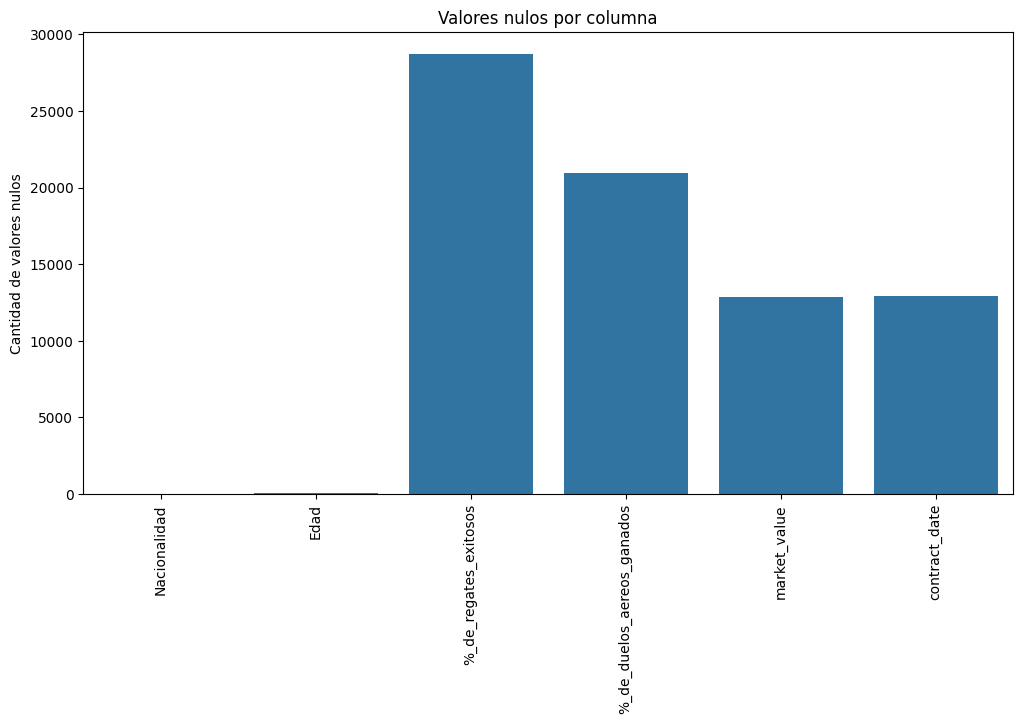

Nacionalidad: 32
Edad: 48
%_de_regates_exitosos: 28722
%_de_duelos_aereos_ganados: 20957
market_value: 12894
contract_date: 12916


In [6]:
# Nulos por columna

columns = data.columns
nulls_per_column = {}
for col in columns:
    if data[col].isnull().sum() > 0:
        nulls_per_column[col] = data[col].isnull().sum()

plt.figure(figsize=(12,6))
sns.barplot(x=list(nulls_per_column.keys()), y=list(nulls_per_column.values()))
plt.xticks(rotation=90)
plt.ylabel("Cantidad de valores nulos")
plt.title('Valores nulos por columna')
plt.show()


for col_name, null_count in nulls_per_column.items():
    if null_count > 0:
        print(f"{col_name}: {null_count}")


#### 1.3 Detección y eliminación de columnas duplicadas

In [7]:
# columnas repetidas

data.T.duplicated().sum()
data.T[data.T.duplicated(keep=False)].T

,xAG,xAG.1,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,xAG.2,xAG.3,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Centros
0,0.0,0.0,60,60,60,6,6,1,1,0.0,0.0,8,43,43,43,8
1,0.7,0.7,30,30,30,2,2,0,0,0.7,0.7,1,22,22,22,1
2,0.1,0.1,33,33,33,1,1,1,1,0.1,0.1,2,28,28,28,2
3,0.1,0.1,33,33,33,1,1,1,1,0.1,0.1,2,28,28,28,2
4,0.2,0.2,11,11,11,0,0,0,0,0.2,0.2,1,10,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57929,0.0,0.0,16,16,16,0,0,0,0,0.0,0.0,2,12,12,12,2
57930,0.0,0.0,4,4,4,1,1,0,0,0.0,0.0,0,4,4,4,0
57931,0.0,0.0,32,32,32,3,3,2,2,0.0,0.0,1,29,29,29,1
57932,0.0,0.0,35,35,35,3,3,0,0,0.0,0.0,3,27,27,27,3


In [8]:
# Borrar columnas repetidas
data = data.loc[:,~data.T.duplicated()]
data.shape


(57934, 40)

#### 1.4 Tipos de datos

In [9]:
# Tipo de dato de cada columna. Nos sirve para identificar columnas categóricas y numéricas y cuales no son la categoría que deberian ser
data.dtypes 

Jugador                            object
Nacionalidad                       object
Posicion                           object
Edad                               object
Dia_partido                        object
Goles                               int64
Tiros Totales                       int64
xG                                float64
npxG                              float64
xAG                               float64
Acciones_que_crean_tiros            int64
Pases_intentados                    int64
Pases_progresivos                   int64
Regates_exitosos                    int64
Pases_medios_completados            int64
Pases_largos_completados            int64
xA                                float64
Pases_en_ultimo_tercio              int64
Pases_balon_vivo                    int64
Pases_balon_muerto                  int64
Pases_al_hueco                      int64
Pases_centros                       int64
Pases_completados                   int64
Pases_fuera_de_juego              

##### 1.4.1 Arreglando Market_value

Es importante arreglar este tipo de dato ya que como es el valor objetivo se necesita ver las relaciones con esta variable



In [10]:
# arreglando market_value

data[['cantidad', 'sufijo']] = data['market_value'].replace({  '-': np.nan, "error": np.nan}, regex=True).str.extract(r'€?([\d\.]+)([mk]?)')
data['cantidad'] = data['cantidad'].astype(float)

# Convertir según sufijo
data['precio_millones'] = data.apply(
    lambda row: row['cantidad'] * 1000000 if row['sufijo'] == 'm' else row['cantidad']*1000 if row['sufijo'] == 'k' else row['cantidad'],
    axis=1
)

data[['market_value', 'cantidad', 'sufijo', 'precio_millones']].sample(10)



,market_value,cantidad,sufijo,precio_millones
21071,NaN,NaN,NaN,NaN
45887,€22.00m,22.0,m,22000000.0
21823,€1.20m,1.2,m,1200000.0
1362,€10.00m,10.0,m,10000000.0
41290,€1.80m,1.8,m,1800000.0
25535,€4.00m,4.0,m,4000000.0
47167,€35.00m,35.0,m,35000000.0
9731,€90.00m,90.0,m,90000000.0
25020,€7.00m,7.0,m,7000000.0
3757,€30.00m,30.0,m,30000000.0


In [11]:
data = data.drop(columns=['cantidad', 'sufijo'])


#### 1.5 Estadisticas descriptivas 

##### 1.5.1 Descripción variables numericas

In [12]:
# Seleccionar las columnas numéricas
number_columns = data.select_dtypes(include=[np.number]).columns

data[number_columns].describe()


,Goles,Tiros Totales,xG,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_medios_completados,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,precio_millones
count,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,29212.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,36977.000000,4.484000e+04
mean,0.513015,0.792402,0.088635,0.080473,0.062784,1.416750,31.659716,2.416232,0.487451,11.226309,2.341941,0.055056,1.976232,28.593900,2.956140,0.096196,1.133652,25.745624,0.109677,1.502727,0.041513,9.201091,1.410950,43.171587,0.534522,0.801809,0.950133,0.574033,25.518383,2.382470,0.781337,0.834795,48.814187,2.879796e+07
std,16.440600,1.158538,0.209810,0.186549,0.152033,1.727395,22.963272,2.756341,0.897683,10.984869,2.867533,0.122355,2.583320,21.511297,3.733981,0.342576,2.005869,20.703206,0.345491,2.169317,0.207865,9.322087,1.957006,40.232967,0.934409,1.210875,1.221368,0.931852,19.001270,3.158174,1.005105,1.305149,39.560765,3.372563e+08
min,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+04
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,3.600000e+06
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,28.000000,2.000000,0.000000,8.000000,1.000000,0.000000,1.000000,24.000000,1.000000,0.000000,0.000000,21.000000,0.000000,1.000000,0.000000,7.000000,1.000000,42.900000,0.000000,0.000000,1.000000,0.000000,22.000000,1.000000,0.000000,0.000000,50.000000,1.000000e+07
75%,0.000000,1.000000,0.100000,0.100000,0.100000,2.000000,45.000000,4.000000,1.000000,16.000000,3.000000,0.100000,3.000000,40.000000,4.000000,0.000000,1.000000,37.000000,0.000000,2.000000,0.000000,14.000000,2.000000,100.000000,1.000000,1.000000,1.000000,1.000000,36.000000,4.000000,1.000000,1.000000,100.000000,2.400000e+07
max,995.000000,12.000000,2.900000,2.900000,2.100000,16.000000,171.000000,30.000000,15.000000,95.000000,24.000000,1.400000,37.000000,170.000000,35.000000,8.000000,25.000000,163.000000,5.000000,21.000000,3.000000,102.000000,25.000000,100.000000,10.000000,16.000000,10.000000,8.000000,159.000000,36.000000,9.000000,16.000000,100.000000,9.999990e+09


Podemos evidenciar la presencia de datos fuera de lo normal. Por ejemplo, goles negativos o muy altos o un precio de 9 millones de euros para un jugador.

##### 1.5.2 Cajas y bigotes para detectar patrones

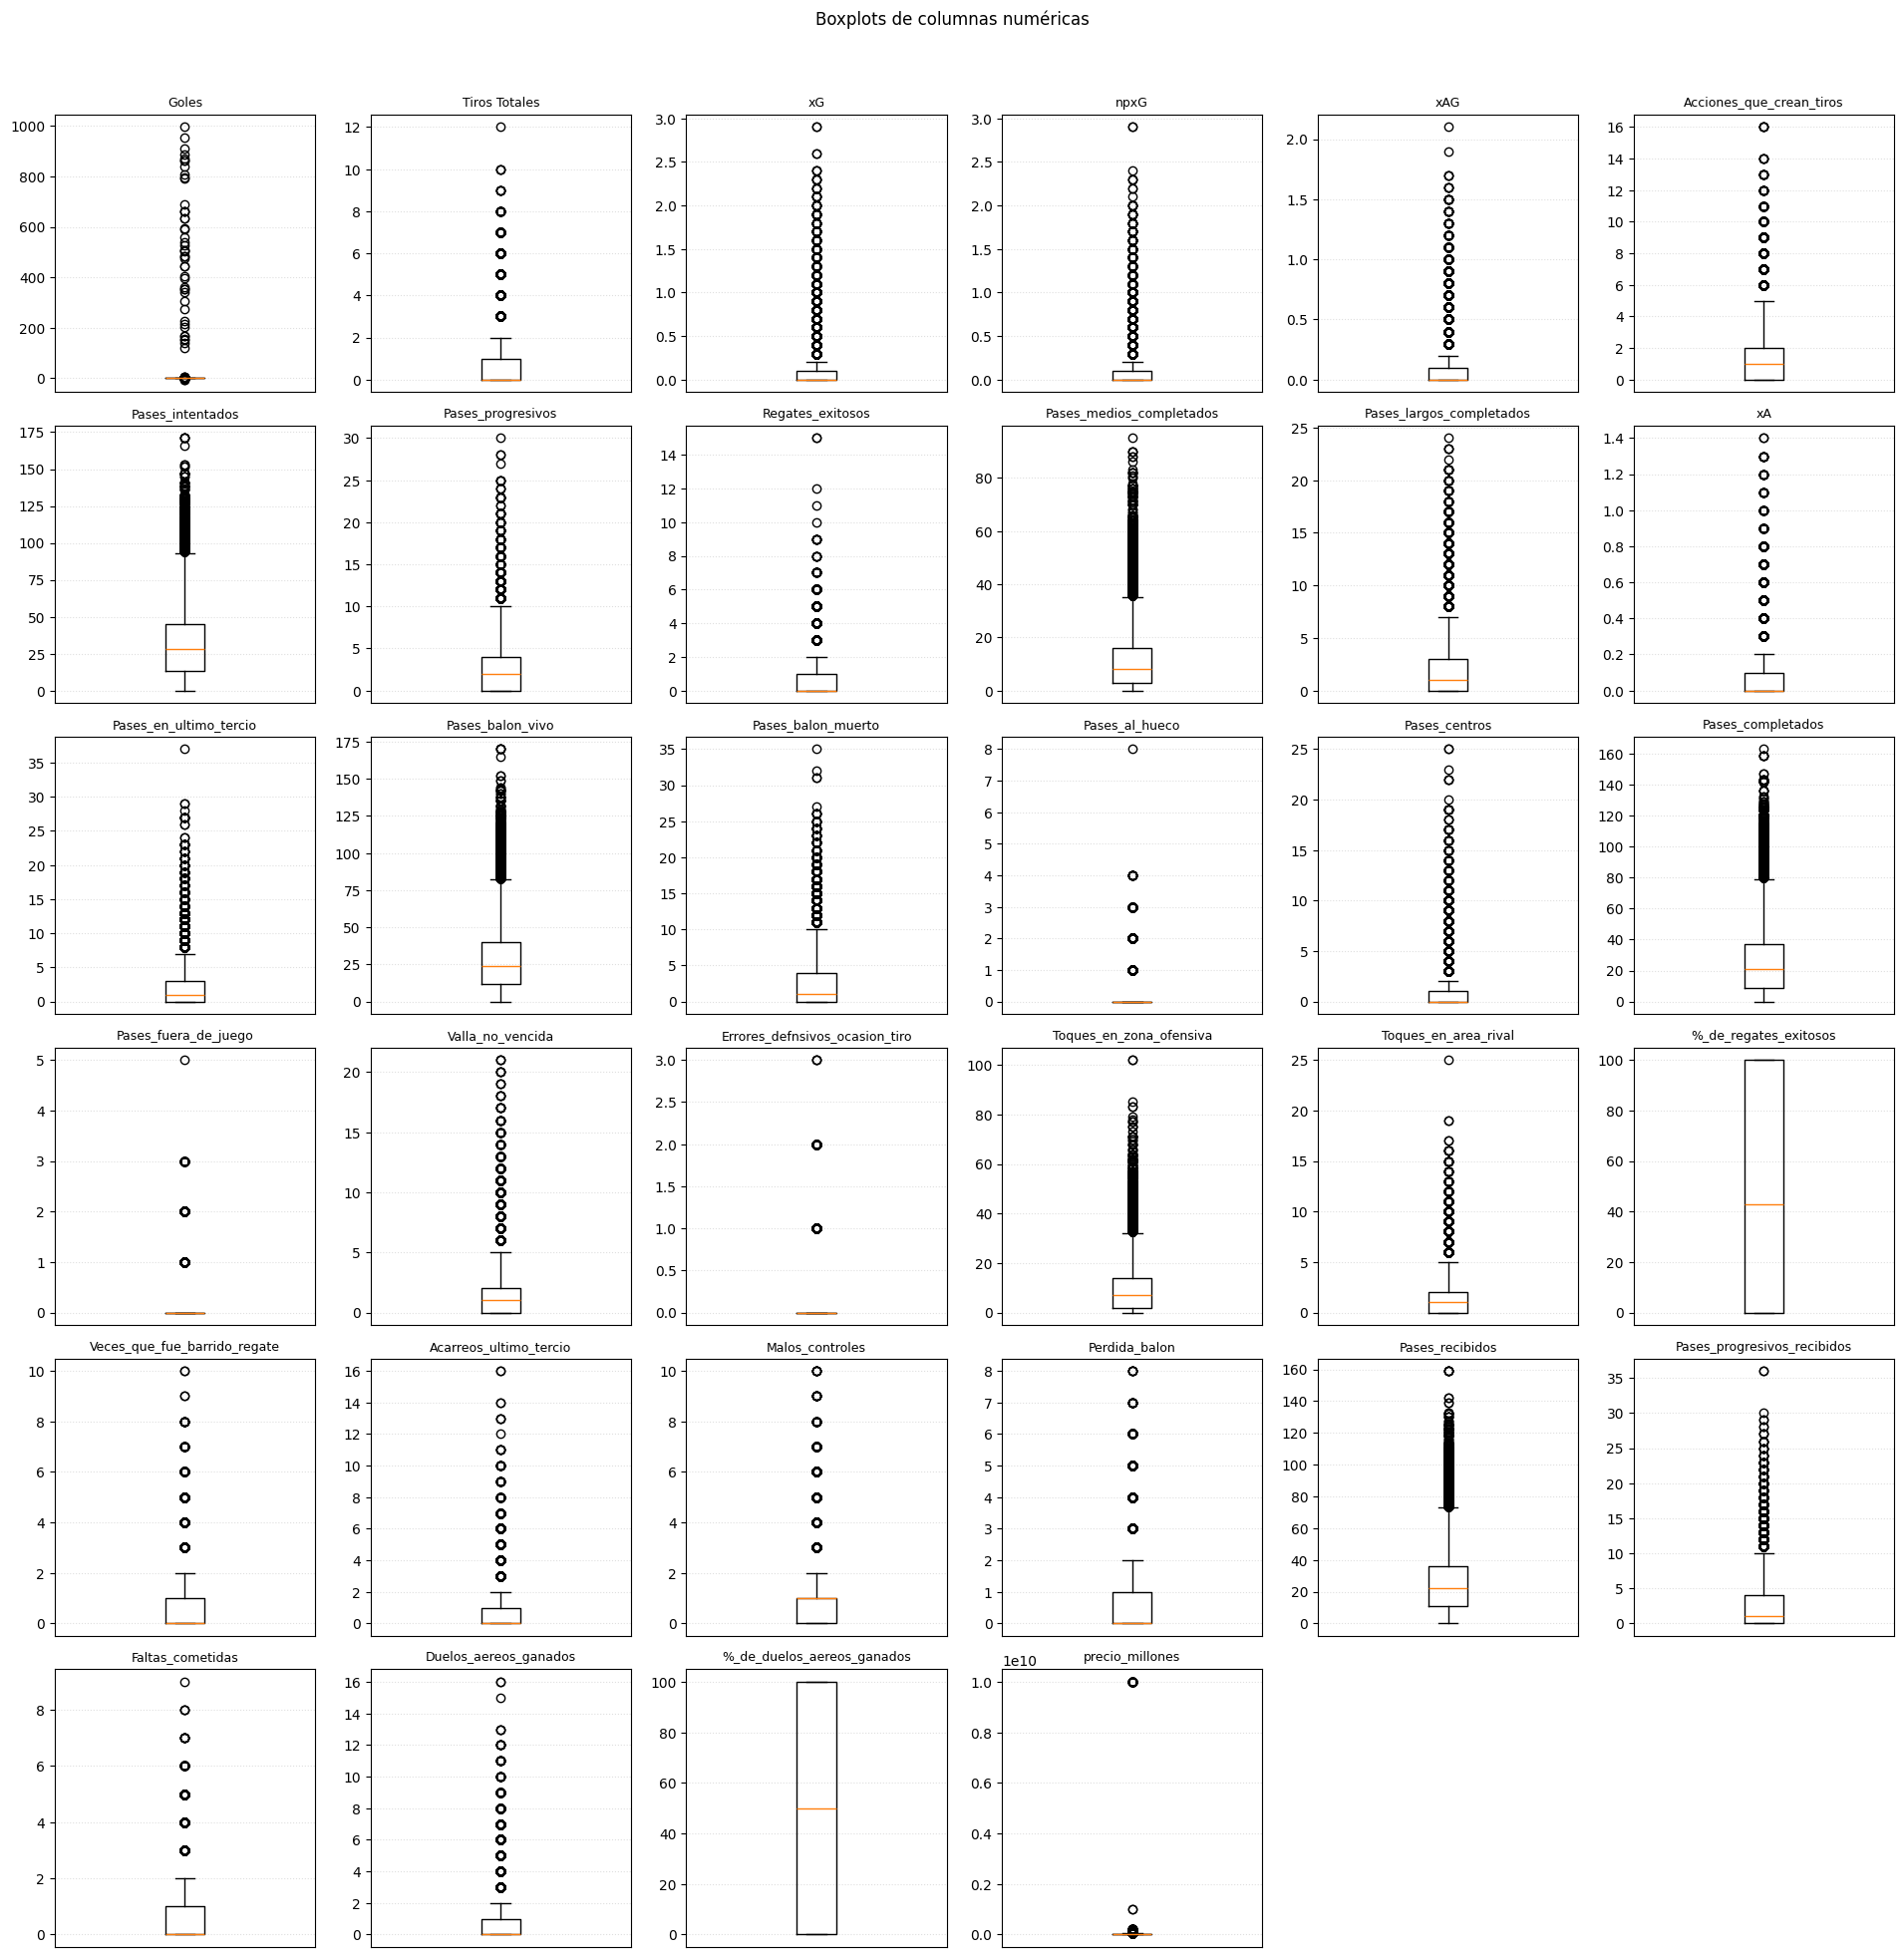

In [13]:
n = len(number_columns)

cols = 6 if n > 20 else 4
rows = math.ceil(n / cols)

# Tamaño de figura proporcional a la grilla
fig, axes = plt.subplots(rows, cols, figsize=(cols * 3.2, rows * 3.2))
axes = axes.flatten() if n > 1 else [axes]

for i, col in enumerate(number_columns):
    serie = data[col].dropna()
    # Boxplot por columna
    axes[i].boxplot(serie, vert=True, showfliers=True, whis=1.5)
    axes[i].set_title(str(col), fontsize=9)
    axes[i].set_xticks([])  # sin etiquetas en x para evitar ruido visual
    axes[i].grid(True, axis='y', linestyle=':', alpha=0.4)

# Ocultar ejes sobrantes si la grilla es mayor que la cantidad de columnas
for j in range(i + 1, rows * cols):
    axes[j].axis('off')

fig.suptitle('Boxplots de columnas numéricas', fontsize=12, y=1.02)
plt.tight_layout()
plt.show()


##### 1.5.2 Estadisticas especificas variable objetivo

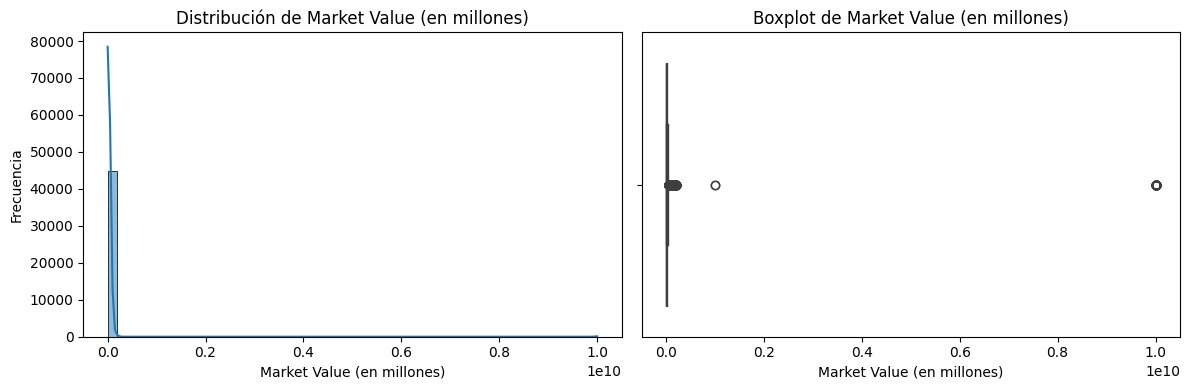

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histograma 
sns.histplot(data['precio_millones'].dropna(), bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribución de Market Value (en millones)')
axes[0].set_xlabel('Market Value (en millones)')
axes[0].set_ylabel('Frecuencia')

# Boxplot
sns.boxplot(x=data['precio_millones'].dropna(), ax=axes[1])
axes[1].set_title('Boxplot de Market Value (en millones)')
axes[1].set_xlabel('Market Value (en millones)')

plt.tight_layout()  # Ajusta automáticamente los espacios
plt.show()

##### 1.5.3 Correlaciones 

In [15]:
col_objetivo = 'precio_millones'
correlaciones = data.corr(numeric_only=True)[col_objetivo].drop(col_objetivo)
correlaciones = correlaciones.sort_values(ascending=False)

print(correlaciones)

Goles                             0.589467
Pases_recibidos                   0.022306
Pases_balon_vivo                  0.020446
Pases_completados                 0.019978
Pases_medios_completados          0.017640
Pases_intentados                  0.017546
Pases_progresivos                 0.016144
xG                                0.013942
Toques_en_zona_ofensiva           0.013156
Pases_en_ultimo_tercio            0.011416
Acciones_que_crean_tiros          0.011209
Toques_en_area_rival              0.010978
npxG                              0.010182
Tiros Totales                     0.009810
Pases_largos_completados          0.009422
Perdida_balon                     0.009271
xAG                               0.007332
Pases_progresivos_recibidos       0.006949
Regates_exitosos                  0.006545
xA                                0.006299
Veces_que_fue_barrido_regate      0.005888
Acarreos_ultimo_tercio            0.005435
Pases_al_hueco                    0.005337
Pases_fuera

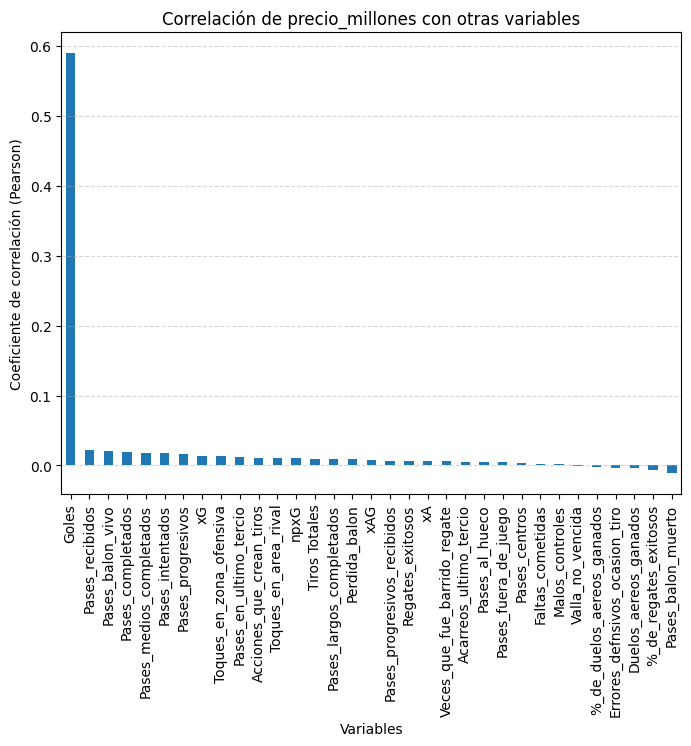

In [16]:
plt.figure(figsize=(8,6))
correlaciones.plot(kind='bar')
plt.title(f'Correlación de {col_objetivo} con otras variables')
plt.ylabel('Coeficiente de correlación (Pearson)')
plt.xlabel('Variables')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

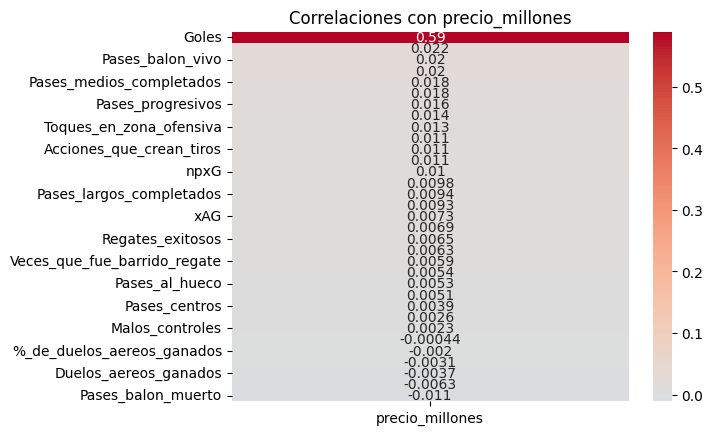

In [17]:
sns.heatmap(correlaciones.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title(f'Correlaciones con {col_objetivo}')
plt.show()

##### 1.5.4 Correlaciones entre variables

Esta correlación sirve para encontrar columnas redundantes

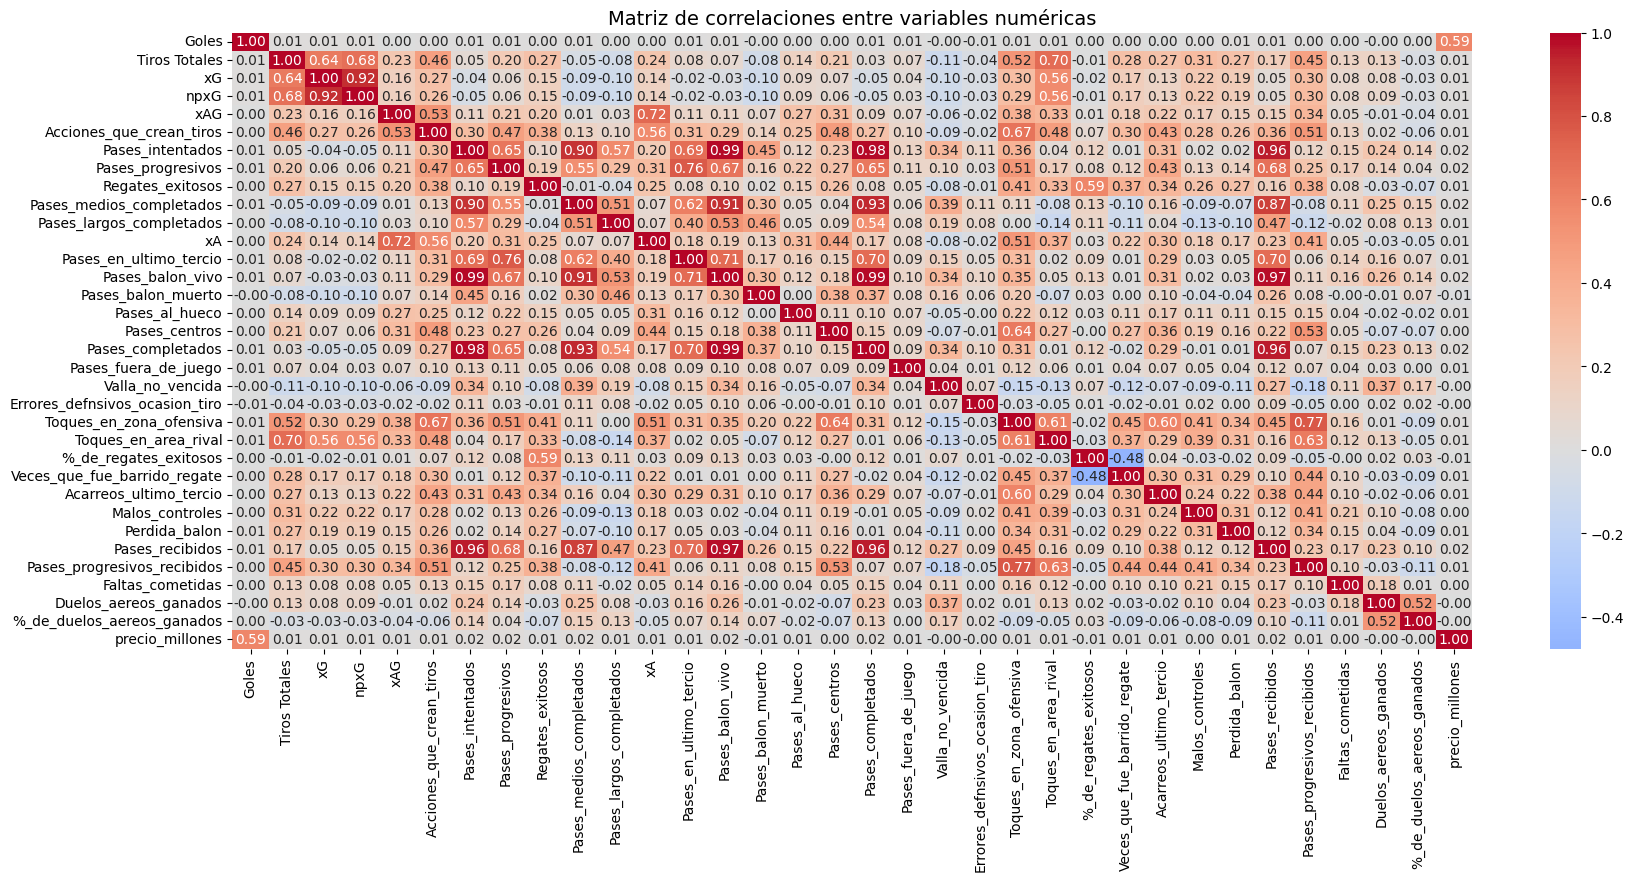

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de correlaciones entre variables numéricas", fontsize=14)
plt.show()

##### 1.6 Conclusión entendimiento de los datos

¿Cuántas columnas tenemos?\
¿Qué tipos de datos tenemos?\
¿Cuánta información nula hay?\
Columnas repetidas\
¿Estos datos representan la situación real?\
¿Cuáles son las tendencias de los datos?


La fuente de los datos que tenemos es un archivo csv, el cual trata de 57934 jugadores de futbol (filas) con diferentes estadísticas las cuales definen como performaron en diferntes partidos. En este data set tenemos una cantidad de 50 columnas, de las cuales 34 son numeros enteros, 9 columnas son numeros decimales y 7 columnas son categoricas.  Entre los tipos de datos podemos encontrar cadenas de caracteres, numero enteros y flotantes, porcentajes y otros tipos de datos mixtos. En cuanto a la información vacía se ve mayormente en las columnas %_de_regates_exitosos con 28722 datos faltantes, %_de_duelos_aereos_ganados con 20957 datos vacíos, market_value con 12894 datos nulos y contract_date con 12916 datos vacíos. Otras columnas con datos vacíos, pero con una menor cantidad son nacionalidad y edad.  De la misma forma ahí celdas con caracteres que no deberían ser caracteres como un guion o un mensaje error. “tendencias de datos” 

# 2. preparacion de datos (Estudiante 3)
##### 2.1 Selccion de los datos
Se genera una lista con las varibeles que se consideraron las mas importantates y que afectan más el market_value de un jugador. Para trabajar con estas variables.

In [19]:
variables = ["Jugador", "Nacionalidad", "Posicion", "Edad", "Dia_partido", "Goles", "Pases_recibidos", "Pases_balon_vivo", "Pases_completados", "Pases_intentados", "xG", "precio_millones"]
dfescojido = data.copy()
display(dfescojido.head())

,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_medios_completados,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date,precio_millones
0,Bruno Fernandes,pt POR,"FW,AM",29-343,"Friday August 16, 2024",0,6,1.2,1.2,0.0,2,60,6,1,14,4,0.0,4,51,8,0,8,43,1,0,0,36,3,100.0,0,5,1,2,51,7,0,0,0.0,€50.00m,30.06.2027,5.000000e+07
1,Marcus Rashford,eng ENG,LW,26-290,"Friday August 16, 2024",0,0,0.0,0.0,0.7,1,30,2,0,2,1,0.1,2,30,0,0,1,22,0,1,0,26,4,0.0,5,1,2,1,37,9,1,1,100.0,€50.00m,30.06.2026,5.000000e+07
2,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",0,0,0.0,0.0,0.1,1,33,1,1,6,1,0.1,1,28,4,0,2,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,0,0.0,-,30.06.2027,NaN
3,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",-5,0,0.0,0.0,0.1,1,33,1,1,6,1,0.1,1,28,4,0,2,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,0,0.0,€1000.00m,30.06.2030,1.000000e+09
4,Alejandro Garnacho,ar ARG,RW,20-046,"Friday August 16, 2024",0,2,0.7,0.7,0.2,3,11,0,0,3,0,0.1,0,11,0,0,1,10,0,1,0,10,3,0.0,1,0,2,1,12,3,0,1,50.0,€45.00m,30.06.2028,4.500000e+07


### Ingeniería de características

### Estandarización de datos y limpieza de datos
Primero que vamos a hacer una integracion de las fechas y de la edad de los jugadores poniendo todas en un mismo formato

In [20]:
dfescojido.loc[:, "Dia_partido"] = dfescojido["Dia_partido"].str.replace(" North", "")
dfescojido.loc[:, "Dia_partido"] = dfescojido["Dia_partido"].str.replace(" West", "")
dfescojido.loc[:, "Dia_partido"] = dfescojido["Dia_partido"].str.replace(" Derby", "")
dfescojido.loc[:, "Dia_partido"] = dfescojido["Dia_partido"].str.replace(" El", "")
dfescojido.loc[:, "Dia_partido"] = dfescojido["Dia_partido"].str.replace(" Choc", "")
dfescojido.loc[:, "Dia_partido"] = pd.to_datetime(dfescojido["Dia_partido"], format="%A %B %d, %Y")



In [21]:

dfescojido['Edad'] = (
    dfescojido['Edad'].str.split('-').str[0].astype("Int64") * 365 +
    dfescojido['Edad'].str.split('-').str[1].astype("Int64")
)

dfescojido.to_csv("dfescojido_limpio.csv", index=False)


para la estandarisacion y la limpieza de datos vamos a usar una grafica de cajas y bigotes para definir cuales son los datos atipicos y despues poder solucionar este problema.

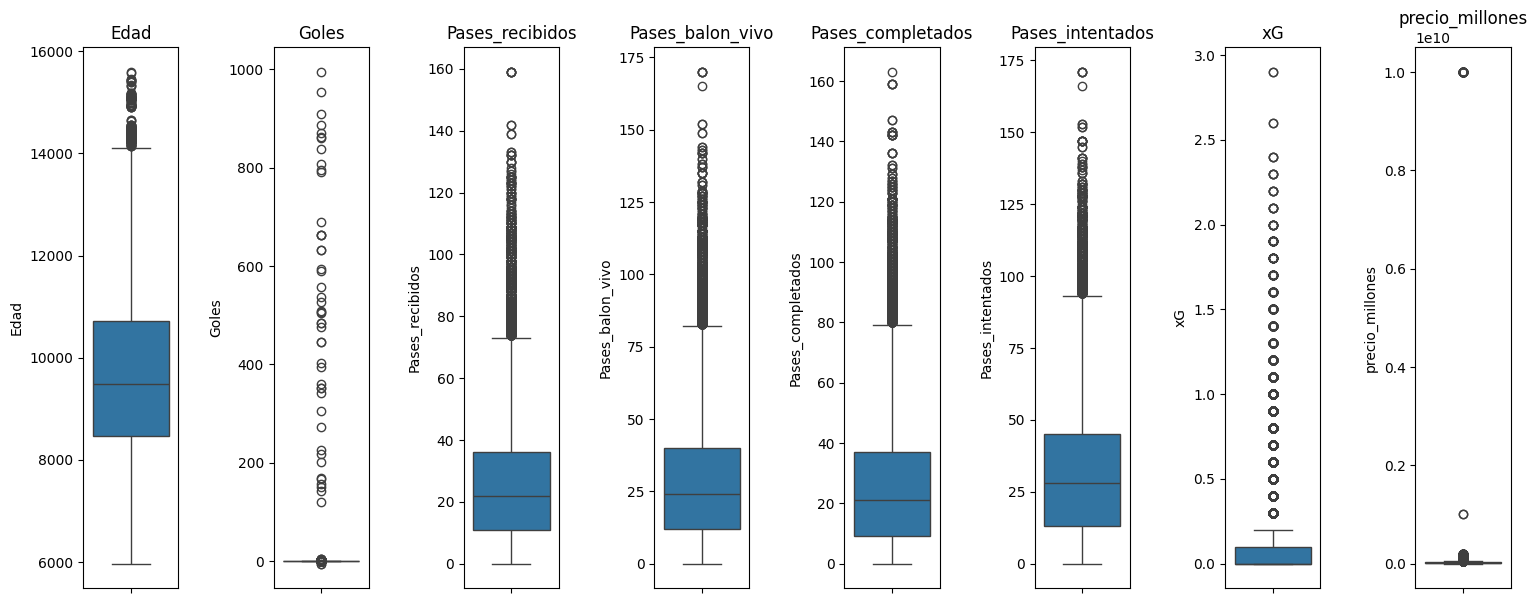

In [22]:

l = dfescojido.dtypes

number_columns = dfescojido[["Jugador", "Nacionalidad", "Posicion", "Edad", "Dia_partido", "Goles", "Pases_recibidos", "Pases_balon_vivo", "Pases_completados", "Pases_intentados", "xG", "precio_millones"]].select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(nrows=1, ncols=len(number_columns), figsize=(15, 6))

plt.tight_layout()

for i, variable in enumerate(number_columns):
    sns.boxplot(y=dfescojido[variable], ax=axes[i])
    axes[i].set_title(f"{variable}")
plt.subplots_adjust(wspace=1) 
plt.show()

Al analizar los datos, se identificaron dos variables con baja coherencia estadística: los goles anotados por partido y el precio del jugador en millones. Ambas presentan una cantidad significativa de valores atípicos que carecen de lógica deportiva o consistencia estadística. Dado que los jugadores aparecen en múltiples partidos dentro de la base de datos, es posible calcular un promedio individual tanto de goles como de precio. Estos promedios servirán como referencia para corregir los registros que contienen valores nulos o atípicos en dichas columnas. La corrección se realizará imputando los valores faltantes o extremos con el promedio correspondiente del jugador, siempre que este promedio sea válido (es decir, no nulo ni considerado atípico). En los casos en que un jugador no cuente con información suficiente para calcular un promedio confiable, se eliminarán sus registros, ya que en este punto no tendría sentido intentar estimar su precio o una cantidad de goles sin datos representativos que respalden dicha predicción.



In [23]:
dfescojido = dfescojido.sort_values(by=["Jugador", "Dia_partido"], ascending=False)
limitadoPrecio = dfescojido[(dfescojido['precio_millones'] >= 0) & (dfescojido['precio_millones'] <= 500000000)]
mediaPrecioJugador = limitadoPrecio.groupby('Jugador')['precio_millones'].mean()
print(mediaPrecioJugador)
limitadoGoles = dfescojido[(dfescojido['Goles'] >= 0) & (dfescojido['Goles'] <= 13)]
mediaGolesJugador = limitadoGoles.groupby('Jugador')['Goles'].mean()
print(mediaGolesJugador)

for jugador, media in mediaPrecioJugador.items():
    dfescojido.loc[
        (dfescojido['Jugador'] == jugador) & 
        (dfescojido['precio_millones'] < 0) & 
        (dfescojido['precio_millones'] > 500000000), 
        'precio_millones'
    ] = round(media)

dfescojido = dfescojido.dropna(subset=['precio_millones'])
dfescojido = dfescojido[(dfescojido['precio_millones'] >= 0) & (dfescojido['precio_millones'] <= 500000000)]

for jugador, media in mediaGolesJugador.items():
    dfescojido.loc[
        (dfescojido['Jugador'] == jugador) & 
        (dfescojido['Goles'] < 0) & 
        (dfescojido['Goles'] > 13), 
        'Goles'
    ] = round(media)


dfescojido = dfescojido.dropna(subset=['Goles'])
dfescojido = dfescojido[(dfescojido['Goles'] >= 0) & (dfescojido['Goles'] <= 13)]
display(dfescojido)
dfescojido.to_csv("dfescojido.csv", index=False)

Jugador
Aaron Ciammaglichella      700000.0
Aaron Martin              6500000.0
Aaron Ramsdale           13000000.0
Aaron WanBissaka         24000000.0
Abakar Sylla             10000000.0
                            ...    
Zeki Celik                6000000.0
Zion Suzuki              15000000.0
Zito Luvumbo              5000000.0
Ørjan Nyland               900000.0
Þorir Johann Helgason     3000000.0
Name: precio_millones, Length: 1533, dtype: float64
Jugador
Aaron Ciammaglichella    0.000000
Aaron Cresswell          0.000000
Aaron Malouda            0.000000
Aaron Martin             0.000000
Aaron Ramsdale           0.000000
                           ...   
Ørjan Nyland             0.000000
Þorir Johann Helgason    0.000000
Đorđe Petrovic           0.000000
Łukasz Fabianski         0.000000
Łukasz Skorupski         0.111111
Name: Goles, Length: 2242, dtype: float64


,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_medios_completados,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date,precio_millones
37429,Þorir Johann Helgason,is ISL,LM,8999,2025-05-25 00:00:00,0,0,0.0,0.0,0.0,1,9,0,1,2,1,0.0,0,5,4,0,0,7,0,1,0,5,1,100.0,0,0,1,0,2,0,0,0,0.0,€3.00m,30.06.2026,3000000.0
37176,Þorir Johann Helgason,is ISL,AM,8992,2025-05-18 00:00:00,0,1,0.1,0.1,0.1,1,12,1,0,3,1,0.1,0,8,4,0,3,8,0,0,0,8,1,NaN,0,0,0,0,8,3,1,0,NaN,€3.00m,30.06.2026,3000000.0
36746,Þorir Johann Helgason,is ISL,AM,8985,2025-05-11 00:00:00,0,0,0.0,0.0,0.0,0,30,3,1,12,5,0.0,1,24,6,0,5,21,0,0,0,14,1,100.0,0,0,1,1,19,4,0,0,NaN,€3.00m,30.06.2026,3000000.0
36325,Þorir Johann Helgason,is ISL,DM,8977,2025-05-03 00:00:00,0,2,0.1,0.1,0.0,0,23,1,0,3,4,0.0,3,22,1,0,3,15,0,0,1,10,1,NaN,0,0,0,0,18,3,0,2,66.7,€3.00m,30.06.2026,3000000.0
36110,Þorir Johann Helgason,is ISL,LW,8971,2025-04-27 00:00:00,0,0,0.0,0.0,0.0,0,4,1,0,2,0,0.0,1,4,0,0,0,4,0,3,0,0,0,NaN,0,0,0,0,2,0,1,0,0.0,€3.00m,30.06.2026,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25891,Aaron Martin,es ESP,"LB,WB",10001,2024-09-15 00:00:00,0,1,0.0,0.0,0.3,9,56,6,0,8,6,0.7,5,45,11,0,14,38,0,2,0,28,0,NaN,0,1,1,1,38,6,0,2,100.0,€6.50m,30.06.2026,6500000.0
25653,Aaron Martin,es ESP,WB,9987,2024-09-01 00:00:00,0,0,0.0,0.0,0.1,2,55,5,0,19,6,0.6,6,39,16,0,12,39,0,3,0,18,1,0.0,1,0,0,0,35,4,1,1,50.0,€6.50m,30.06.2026,6500000.0
25197,Aaron Martin,es ESP,WB,9979,2024-08-24 00:00:00,0,1,0.0,0.0,0.0,4,40,5,0,12,2,0.1,4,26,14,0,8,26,0,3,0,16,1,NaN,0,3,0,1,19,3,2,1,100.0,€6.50m,30.06.2026,6500000.0
24784,Aaron Martin,es ESP,"WB,LM",9972,2024-08-17 00:00:00,0,0,0.0,0.0,0.0,2,32,1,1,10,1,0.0,1,18,14,0,6,20,0,1,1,13,0,50.0,0,1,1,0,17,3,1,0,0.0,€6.50m,30.06.2026,6500000.0


Como tercer paso para limpiar los datos se van a eliminar todos los datos donde toda la infomacion esta repetida, estos no aportaran nada al modelo.

In [24]:

dfescojido = dfescojido.drop_duplicates()

Como siguentes paso vamos asignarle la nacionalidad a todos los datos que tienen esta celda en nullo. Esto se hace con informacion que se encontro en internet de estos jugadores.

In [25]:
dfescojido.loc[
        (dfescojido['Jugador'] == "Fer Lopez"), "Nacionalidad"
    ] = "es ESP"

dfescojido.loc[
        (dfescojido['Jugador'] == "Mateus Mane"), "Nacionalidad"
    ] = "pt POR"
display(dfescojido)

,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_medios_completados,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date,precio_millones
37429,Þorir Johann Helgason,is ISL,LM,8999,2025-05-25 00:00:00,0,0,0.0,0.0,0.0,1,9,0,1,2,1,0.0,0,5,4,0,0,7,0,1,0,5,1,100.0,0,0,1,0,2,0,0,0,0.0,€3.00m,30.06.2026,3000000.0
37176,Þorir Johann Helgason,is ISL,AM,8992,2025-05-18 00:00:00,0,1,0.1,0.1,0.1,1,12,1,0,3,1,0.1,0,8,4,0,3,8,0,0,0,8,1,NaN,0,0,0,0,8,3,1,0,NaN,€3.00m,30.06.2026,3000000.0
36746,Þorir Johann Helgason,is ISL,AM,8985,2025-05-11 00:00:00,0,0,0.0,0.0,0.0,0,30,3,1,12,5,0.0,1,24,6,0,5,21,0,0,0,14,1,100.0,0,0,1,1,19,4,0,0,NaN,€3.00m,30.06.2026,3000000.0
36325,Þorir Johann Helgason,is ISL,DM,8977,2025-05-03 00:00:00,0,2,0.1,0.1,0.0,0,23,1,0,3,4,0.0,3,22,1,0,3,15,0,0,1,10,1,NaN,0,0,0,0,18,3,0,2,66.7,€3.00m,30.06.2026,3000000.0
36110,Þorir Johann Helgason,is ISL,LW,8971,2025-04-27 00:00:00,0,0,0.0,0.0,0.0,0,4,1,0,2,0,0.0,1,4,0,0,0,4,0,3,0,0,0,NaN,0,0,0,0,2,0,1,0,0.0,€3.00m,30.06.2026,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25891,Aaron Martin,es ESP,"LB,WB",10001,2024-09-15 00:00:00,0,1,0.0,0.0,0.3,9,56,6,0,8,6,0.7,5,45,11,0,14,38,0,2,0,28,0,NaN,0,1,1,1,38,6,0,2,100.0,€6.50m,30.06.2026,6500000.0
25653,Aaron Martin,es ESP,WB,9987,2024-09-01 00:00:00,0,0,0.0,0.0,0.1,2,55,5,0,19,6,0.6,6,39,16,0,12,39,0,3,0,18,1,0.0,1,0,0,0,35,4,1,1,50.0,€6.50m,30.06.2026,6500000.0
25197,Aaron Martin,es ESP,WB,9979,2024-08-24 00:00:00,0,1,0.0,0.0,0.0,4,40,5,0,12,2,0.1,4,26,14,0,8,26,0,3,0,16,1,NaN,0,3,0,1,19,3,2,1,100.0,€6.50m,30.06.2026,6500000.0
24784,Aaron Martin,es ESP,"WB,LM",9972,2024-08-17 00:00:00,0,0,0.0,0.0,0.0,2,32,1,1,10,1,0.0,1,18,14,0,6,20,0,1,1,13,0,50.0,0,1,1,0,17,3,1,0,0.0,€6.50m,30.06.2026,6500000.0


Como ultimo paso vamos a calcular la edad para los datos que tienen esta celda en nullo. Esto se hace con informacion que se encontro en internet de estos jugadores.

In [26]:
nacimiento =  pd.to_datetime("24/05/2004", format="%d/%m/%Y")

indeces_fer = dfescojido.loc[
        (dfescojido['Jugador'] == "Fer Lopez")
    ].index

for i in indeces_fer:
    edadp =  (dfescojido["Dia_partido"][i] - nacimiento)
    años = edadp.days
    dfescojido["Edad"][i] = float(años)


nacimiento =  pd.to_datetime("16/11/2007", format="%d/%m/%Y")

indeces_fer = dfescojido.loc[
        (dfescojido['Jugador'] == "Mateus Mane") &
        (dfescojido['Edad'].isnull())
    ].index

for i in indeces_fer:
    edadp =  (dfescojido["Dia_partido"][i] - nacimiento)
    años = edadp.days


    dfescojido["Edad"][i] = float(años)

display(dfescojido)

C:\Users\msant\AppData\Local\Temp\ipykernel_3448\980388290.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfescojido["Edad"][i] = float(años)
C:\Users\msant\AppData\Local\Temp\ipykernel_3448\980388290.py:25: FutureWarning: ChainedAssig

,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_medios_completados,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date,precio_millones
37429,Þorir Johann Helgason,is ISL,LM,8999,2025-05-25 00:00:00,0,0,0.0,0.0,0.0,1,9,0,1,2,1,0.0,0,5,4,0,0,7,0,1,0,5,1,100.0,0,0,1,0,2,0,0,0,0.0,€3.00m,30.06.2026,3000000.0
37176,Þorir Johann Helgason,is ISL,AM,8992,2025-05-18 00:00:00,0,1,0.1,0.1,0.1,1,12,1,0,3,1,0.1,0,8,4,0,3,8,0,0,0,8,1,NaN,0,0,0,0,8,3,1,0,NaN,€3.00m,30.06.2026,3000000.0
36746,Þorir Johann Helgason,is ISL,AM,8985,2025-05-11 00:00:00,0,0,0.0,0.0,0.0,0,30,3,1,12,5,0.0,1,24,6,0,5,21,0,0,0,14,1,100.0,0,0,1,1,19,4,0,0,NaN,€3.00m,30.06.2026,3000000.0
36325,Þorir Johann Helgason,is ISL,DM,8977,2025-05-03 00:00:00,0,2,0.1,0.1,0.0,0,23,1,0,3,4,0.0,3,22,1,0,3,15,0,0,1,10,1,NaN,0,0,0,0,18,3,0,2,66.7,€3.00m,30.06.2026,3000000.0
36110,Þorir Johann Helgason,is ISL,LW,8971,2025-04-27 00:00:00,0,0,0.0,0.0,0.0,0,4,1,0,2,0,0.0,1,4,0,0,0,4,0,3,0,0,0,NaN,0,0,0,0,2,0,1,0,0.0,€3.00m,30.06.2026,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25891,Aaron Martin,es ESP,"LB,WB",10001,2024-09-15 00:00:00,0,1,0.0,0.0,0.3,9,56,6,0,8,6,0.7,5,45,11,0,14,38,0,2,0,28,0,NaN,0,1,1,1,38,6,0,2,100.0,€6.50m,30.06.2026,6500000.0
25653,Aaron Martin,es ESP,WB,9987,2024-09-01 00:00:00,0,0,0.0,0.0,0.1,2,55,5,0,19,6,0.6,6,39,16,0,12,39,0,3,0,18,1,0.0,1,0,0,0,35,4,1,1,50.0,€6.50m,30.06.2026,6500000.0
25197,Aaron Martin,es ESP,WB,9979,2024-08-24 00:00:00,0,1,0.0,0.0,0.0,4,40,5,0,12,2,0.1,4,26,14,0,8,26,0,3,0,16,1,NaN,0,3,0,1,19,3,2,1,100.0,€6.50m,30.06.2026,6500000.0
24784,Aaron Martin,es ESP,"WB,LM",9972,2024-08-17 00:00:00,0,0,0.0,0.0,0.0,2,32,1,1,10,1,0.0,1,18,14,0,6,20,0,1,1,13,0,50.0,0,1,1,0,17,3,1,0,0.0,€6.50m,30.06.2026,6500000.0


In [27]:
dfescojido = dfescojido.drop(columns=['%_de_duelos_aereos_ganados'])
dfescojido = dfescojido.drop(columns=['%_de_regates_exitosos' ])
dfescojido = dfescojido.drop(columns=['market_value'])
dfescojido = dfescojido.drop(columns=['contract_date'])



dfescojido.to_csv("dfescojido_limpio.csv", index=False)

dfescojido = pd.get_dummies(dfescojido, columns=['Nacionalidad'], drop_first=True,dtype=float)


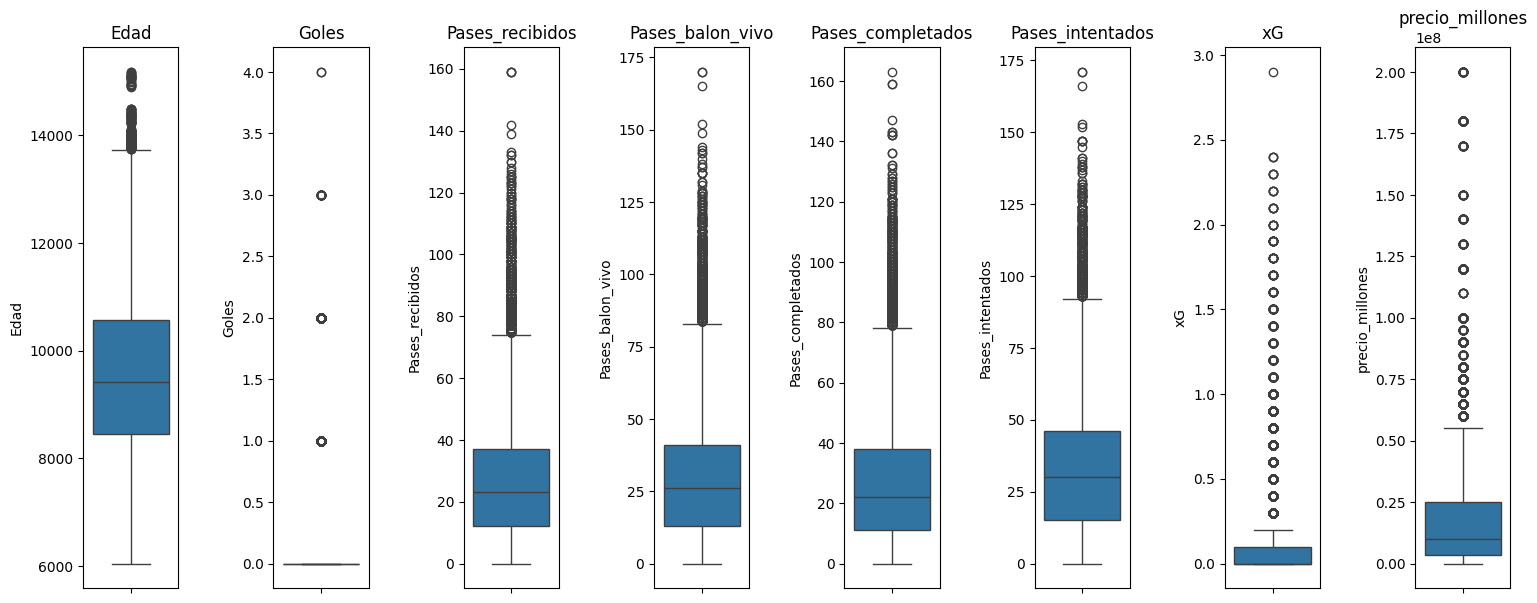

In [29]:

number_columns = dfescojido[["Jugador", "Posicion", "Edad", "Dia_partido", "Goles", "Pases_recibidos", "Pases_balon_vivo", "Pases_completados", "Pases_intentados", "xG", "precio_millones"]].select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(nrows=1, ncols=len(number_columns), figsize=(15, 6))
plt.tight_layout()

for i, variable in enumerate(number_columns):
    sns.boxplot(y=dfescojido[variable], ax=axes[i])
    axes[i].set_title(f"{variable}")
plt.subplots_adjust(wspace=1) 
plt.show()



In [283]:
dfescojido

,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_medios_completados,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Duelos_aereos_ganados,market_value,contract_date,precio_millones
37429,Þorir Johann Helgason,is ISL,LM,8999,2025-05-25 00:00:00,0,0,0.0,0.0,0.0,1,9,0,1,2,1,0.0,0,5,4,0,0,7,0,1,0,5,1,0,0,1,0,2,0,0,0,€3.00m,30.06.2026,3000000.0
37176,Þorir Johann Helgason,is ISL,AM,8992,2025-05-18 00:00:00,0,1,0.1,0.1,0.1,1,12,1,0,3,1,0.1,0,8,4,0,3,8,0,0,0,8,1,0,0,0,0,8,3,1,0,€3.00m,30.06.2026,3000000.0
36746,Þorir Johann Helgason,is ISL,AM,8985,2025-05-11 00:00:00,0,0,0.0,0.0,0.0,0,30,3,1,12,5,0.0,1,24,6,0,5,21,0,0,0,14,1,0,0,1,1,19,4,0,0,€3.00m,30.06.2026,3000000.0
36325,Þorir Johann Helgason,is ISL,DM,8977,2025-05-03 00:00:00,0,2,0.1,0.1,0.0,0,23,1,0,3,4,0.0,3,22,1,0,3,15,0,0,1,10,1,0,0,0,0,18,3,0,2,€3.00m,30.06.2026,3000000.0
36110,Þorir Johann Helgason,is ISL,LW,8971,2025-04-27 00:00:00,0,0,0.0,0.0,0.0,0,4,1,0,2,0,0.0,1,4,0,0,0,4,0,3,0,0,0,0,0,0,0,2,0,1,0,€3.00m,30.06.2026,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25891,Aaron Martin,es ESP,"LB,WB",10001,2024-09-15 00:00:00,0,1,0.0,0.0,0.3,9,56,6,0,8,6,0.7,5,45,11,0,14,38,0,2,0,28,0,0,1,1,1,38,6,0,2,€6.50m,30.06.2026,6500000.0
25653,Aaron Martin,es ESP,WB,9987,2024-09-01 00:00:00,0,0,0.0,0.0,0.1,2,55,5,0,19,6,0.6,6,39,16,0,12,39,0,3,0,18,1,1,0,0,0,35,4,1,1,€6.50m,30.06.2026,6500000.0
25197,Aaron Martin,es ESP,WB,9979,2024-08-24 00:00:00,0,1,0.0,0.0,0.0,4,40,5,0,12,2,0.1,4,26,14,0,8,26,0,3,0,16,1,0,3,0,1,19,3,2,1,€6.50m,30.06.2026,6500000.0
24784,Aaron Martin,es ESP,"WB,LM",9972,2024-08-17 00:00:00,0,0,0.0,0.0,0.0,2,32,1,1,10,1,0.0,1,18,14,0,6,20,0,1,1,13,0,0,1,1,0,17,3,1,0,€6.50m,30.06.2026,6500000.0


## 3. Construcción del modelo (Estudiante 1)

In [284]:


# # One-hot encoding para la columna 'Nacionalidad'
# dffinal = dfescojido
# dffinal = pd.get_dummies(data, columns=['Nacionalidad'], drop_first=True,dtype=float)
# number_columns = dfescojido.select_dtypes(include=[np.number]).columns


# test = dffinal[number_columns].dropna()
# train = test.drop(columns=['precio_millones'])


# print(train.shape)
# X_train, X_test, y_train, y_test = train_test_split(train, test["precio_millones"], test_size=0.3, random_state=5)

# regression_poly = LinearRegression()

# regression_poly.fit(X_train, y_train)

# print("====== Model Performance ======")
# print("Train MAE:", mean_absolute_error(y_train, regression_poly.predict(X_train)))
# print("Test MAE:", mean_absolute_error(y_test, regression_poly.predict(X_test)))
# print("Train RMSE:", np.sqrt(mean_squared_error(y_train, regression_poly.predict(X_train))))
# print("Test RMSE:", np.sqrt(mean_squared_error(y_test, regression_poly.predict(X_test))))
# print("Train R²:", regression_poly.score(X_train, y_train))
# print("Test R²:", regression_poly.score(X_test, y_test))
# print("===============================\n")

In [32]:


dffinal = dfescojido
dffinal
# 3) Selección de numéricas y armado de matrices
number_columns = dffinal.select_dtypes(include=[np.number]).columns
test  = dffinal[number_columns].dropna()
train = test.drop(columns=['precio_millones'])

print(train.shape)  # esperado: (15912, 33)

r_train_max = 0
i_train= 0
r_test_max = 0
i_test = 0
print("Buscando mejor random_state...", end='\r')
for i in range (10):
    print(f"=== Iteración {i+1} ===", end='\r')
    X_train, X_test, y_train, y_test = train_test_split(
        train, test["precio_millones"], test_size=0.3, random_state=i
    )

    reg = LinearRegression().fit(X_train, y_train)

    r_train = reg.score(X_train, y_train)
    r_test = reg.score(X_test, y_test)
    if r_train > r_train_max:
        r_train_max = r_train
        i_train = i
    if r_test > r_test_max:
        r_test_max = r_test
        i_test = i

X_train, X_test, y_train, y_test = train_test_split(
        train, test["precio_millones"], test_size=0.3, random_state=i_test
    )
print("_____________Máximo_____________")
print("Train MAE:",  mean_absolute_error(y_train, reg.predict(X_train)))
print("Test MAE:",   mean_absolute_error(y_test,  reg.predict(X_test)))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, reg.predict(X_train))))
print("Test RMSE:",  np.sqrt(mean_squared_error(y_test,  reg.predict(X_test))))
print("Train R²:",   reg.score(X_train, y_train))
print("Test R²:",    reg.score(X_test,  y_test))
print("________________________________\n")

(37182, 131)
_____________Máximo_____________
Train MAE: 12353577.1050629
Test MAE: 12248415.509552242
Train RMSE: 19221833.646099664
Test RMSE: 19448347.967008114
Train R²: 0.27739730913972704
Test R²: 0.28720263732812545
________________________________



## 4. Construcción del pipeline (Estudiante 1)

### 4.1 Creando función de limpieza de datos

A continuación se va a realizar la integración de todos los pasos de la limpieza en una única función.

In [ ]:
import pandas as pd
import numpy as np

def limpiar_datos(df: pd.DataFrame) -> pd.DataFrame:

    df = df.copy()

    # 1) market_value → precio_millones (en unidades monetarias, no “millones”)
    if 'market_value' in df.columns:
        mv = (
            df['market_value']
            .astype('string')
            .str.lower()
            .str.strip()
            .replace({'-': np.nan, 'error': np.nan})
        )
        # Captura número con posible decimal y sufijo m/k
        ext = mv.str.extract(r'€?\s*([\d]+(?:\.[\d]+)?)\s*([mk]?)', expand=True)
        ext.columns = ['cantidad', 'sufijo']
        cantidad = pd.to_numeric(ext['cantidad'], errors='coerce')  # respeta '.' como decimal
        mult = ext['sufijo'].map({'m': 1_000_000.0, 'k': 1_000.0}).fillna(1.0)
        df['precio_millones'] = cantidad * mult
    
        df = df[df['precio_millones'] < 1e10*0.1]

    # 2) Dia_partido: quitar sufijos y parsear con formato
    if 'Dia_partido' in df.columns:
        col = df['Dia_partido'].astype('string')
        for suf in [" North", " West", " Derby", " El", " Choc"]:
            col = col.str.replace(suf, "", regex=False)
        df['Dia_partido'] = pd.to_datetime(col, format="%A %B %d, %Y")

    # 3) Edad: normalizar,  convertir a int y en dias 
    df['Edad'] = (
        dfescojido['Edad'].astype('string').str.split('-').str[0].astype("Int64") * 365 +
        dfescojido['Edad'].astype('string').str.split('-').str[1].astype("Int64")
    )  # sin errors='coerce' para replicar el lab

    # 4) Value market: vacios y outliers por jugador
    df = df.sort_values(by=["Jugador", "Dia_partido"], ascending=False)
    limitadoPrecio = df[(df['precio_millones'] >= 0) & (df['precio_millones'] <= 500000000)]
    mediaPrecioJugador = limitadoPrecio.groupby('Jugador')['precio_millones'].mean()

    for jugador, media in mediaPrecioJugador.items():
        df.loc[
            (df['Jugador'] == jugador) & 
            (df['precio_millones'] < 0) & 
            (df['precio_millones'] > 500000000), 
            'precio_millones'
        ] = round(media)

    df = df.dropna(subset=['precio_millones'])
    df = df[(df['precio_millones'] >= 0) & (df['precio_millones'] <= 500000000)]

    # 6) Goles: vacios y outliers por jugador
    limitadoGoles = df[(df['Goles'] >= 0) & (df['Goles'] <= 13)]
    mediaGolesJugador = limitadoGoles.groupby('Jugador')['Goles'].mean()
    for jugador, media in mediaGolesJugador.items():
        df.loc[
            (df['Jugador'] == jugador) & 
            (df['Goles'] < 0) & 
            (dfescojido['Goles'] > 13), 
            'Goles'
        ] = round(media)

    df = df.dropna(subset=['Goles'])
    df = df[(df['Goles'] >= 0) & (df['Goles'] <= 13)]
    display(df)
    df.to_csv("df.csv", index=False)

    # 7) Quitar columnas duplicadas (por contenido)
    df = df.drop_duplicates()

    # 8) Correcciones puntuales de Nacionalidad (si aplica)
    if {'Jugador', 'Nacionalidad'}.issubset(df.columns):
        df.loc[df['Jugador'].eq('Fer Lopez'), 'Nacionalidad'] = 'es ESP'
        df.loc[df['Jugador'].eq('Mateus Mane'), 'Nacionalidad'] = 'pt POR'
    
    
    # 9) Correcciones puntuales de nacimiento (si aplica)
    nacimiento =  pd.to_datetime("24/05/2004", format="%d/%m/%Y")

    indeces_fer = df.loc[
            (df['Jugador'] == "Fer Lopez")
        ].index

    for i in indeces_fer:
        edadp =  (df["Dia_partido"][i] - nacimiento)
        años = edadp.days
        df["Edad"][i] = float(años)


    nacimiento =  pd.to_datetime("16/11/2007", format="%d/%m/%Y")

    indeces_fer = df.loc[
            (df['Jugador'] == "Mateus Mane") &
            (df['Edad'].isnull())
        ].index

    for i in indeces_fer:
        edadp =  (df["Dia_partido"][i] - nacimiento)
        años = edadp.days


        df["Edad"][i] = float(años)

    
    dfescojido = dfescojido.drop(columns=['%_de_duelos_aereos_ganados'])
    dfescojido = dfescojido.drop(columns=['%_de_regates_exitosos' ])
    dfescojido = dfescojido.drop(columns=['market_value'])
    dfescojido = dfescojido.drop(columns=['contract_date'])

    display(dfescojido)

    
    df = pd.get_dummies(df, columns=['Nacionalidad'], drop_first=False, dtype=float)



   
    return df




#### 4.2 

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from typing import Optional


class FutAlpesRegressionPipeline(BaseEstimator, RegressorMixin):
    def __init__(self):
        print("Inicializando el pipeline de regresión FutAlpes...")
        self.pipeline = Pipeline([
            ('regressor', LinearRegression())
        ])

        self.model = LinearRegression()
        self.trained = False
        self.feature_columns_: Optional[list[str]] = None

    

    def fit(self, X: pd.DataFrame, y = None):
        print("Entrenando el modelo...")
        data = X.copy()
        
        dffinal = limpiar_datos(data)
        number_columns = dffinal.select_dtypes(include=[np.number]).columns
        data_test  = dffinal[number_columns].dropna()
        data_train = data_test.drop(columns=['precio_millones'])
        
        print(number_columns)        r_train_max = 0
        i_train = 0
        r_test_max = 0
        i_test = 0

        self.feature_columns_ = data_train.columns.tolist()

        print("Buscando mejor random_state...", end='\r')
        for i in range(100):
            X_train, X_test, y_train, y_test = train_test_split(
            data_train, data_test['precio_millones'], test_size=0.3, random_state=i
            )
            self.pipeline.fit(X_train, y_train)
            r_train = self.pipeline.score(X_train, y_train)
            r_test = self.pipeline.score(X_test, y_test)
            if r_train > r_train_max:
                r_train_max = r_train
                i_train = i
            if r_test > r_test_max:
                r_test_max = r_test
                i_test = i

        X_train, X_test, y_train, y_test = train_test_split(
            data_train, data_test['precio_millones'], test_size=0.3, random_state=i_test
        )
        self.pipeline.fit(X_train, y_train)
        y_train_pred = self.pipeline.predict(X_train)
        y_test_pred = self.pipeline.predict(X_test)
        print("====== Model Performance ======")
        print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
        print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
        print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
        print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
        print("Train R²:", r2_score(y_train, y_train_pred))
        print("Test R²:", r2_score(y_test, y_test_pred))
        print("===============================\n")

        self.pipeline.fit(data_train, data_test["precio_millones"])
        self.is_fitted_ = True
        
        return self
        
    def arreglar_datos(self, df: pd.DataFrame) -> pd.DataFrame:
        df = df.copy()
        df = limpiar_datos(df)
        return df
    
    def predict(self, X: pd.DataFrame) -> np.ndarray:
        if not self.is_fitted_:
            raise RuntimeError("El modelo no está entrenado. Llama primero a .fit().")

        df = limpiar_datos(X.copy())
        df_num = df.select_dtypes(include=[np.number]).copy()

        # Asegurar que existen todas las columnas usadas en entrenamiento
        # (si faltan, las creamos con 0; si sobran, las ignoramos)
        for col in self.feature_columns_:
            if col not in df_num.columns:
                df_num[col] = 0.0

        X_pred = df_num[self.feature_columns_].copy()

        # Cuidado: si llega a estar la columna objetivo en X, quítala
        if 'precio_millones' in X_pred.columns:
            X_pred = X_pred.drop(columns=['precio_millones'])

        # Eliminar filas con NaN para evitar errores
        X_pred = X_pred.dropna()

        return self.pipeline.predict(X_pred)

In [ ]:
datos = pd.read_csv(db_location, sep=',')

modelo = FutAlpesRegressionPipeline()
modelo.fit(datos)

Inicializando el pipeline de regresión FutAlpes...
Entrenando el modelo...


,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,...,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date,precio_millones
37429,Þorir Johann Helgason,is ISL,LM,<NA>,2025-05-25,0,0,0.0,0.0,0.0,0.0,1,9,9,9,0,0,1,1,2,1,0.0,0.0,0.0,0,...,4,0,0,7,7,7,0,1,0,5,1,100.0,0,0,1,0,2,0,0,0,0,0.0,€3.00m,30.06.2026,3000000.0
37176,Þorir Johann Helgason,is ISL,AM,<NA>,2025-05-18,0,1,0.1,0.1,0.1,0.1,1,12,12,12,1,1,0,0,3,1,0.1,0.1,0.1,0,...,4,0,3,8,8,8,0,0,0,8,1,NaN,0,0,0,0,8,3,1,3,0,NaN,€3.00m,30.06.2026,3000000.0
36746,Þorir Johann Helgason,is ISL,AM,<NA>,2025-05-11,0,0,0.0,0.0,0.0,0.0,0,30,30,30,3,3,1,1,12,5,0.0,0.0,0.0,1,...,6,0,5,21,21,21,0,0,0,14,1,100.0,0,0,1,1,19,4,0,5,0,NaN,€3.00m,30.06.2026,3000000.0
36325,Þorir Johann Helgason,is ISL,DM,<NA>,2025-05-03,0,2,0.1,0.1,0.0,0.0,0,23,23,23,1,1,0,0,3,4,0.0,0.0,0.0,3,...,1,0,3,15,15,15,0,0,1,10,1,NaN,0,0,0,0,18,3,0,3,2,66.7,€3.00m,30.06.2026,3000000.0
36110,Þorir Johann Helgason,is ISL,LW,<NA>,2025-04-27,0,0,0.0,0.0,0.0,0.0,0,4,4,4,1,1,0,0,2,0,0.0,0.0,0.0,1,...,0,0,0,4,4,4,0,3,0,0,0,NaN,0,0,0,0,2,0,1,0,0,0.0,€3.00m,30.06.2026,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25891,Aaron Martin,es ESP,"LB,WB",<NA>,2024-09-15,0,1,0.0,0.0,0.3,0.3,9,56,56,56,6,6,0,0,8,6,0.3,0.3,0.7,5,...,11,0,14,38,38,38,0,2,0,28,0,NaN,0,1,1,1,38,6,0,14,2,100.0,€6.50m,30.06.2026,6500000.0
25653,Aaron Martin,es ESP,WB,<NA>,2024-09-01,0,0,0.0,0.0,0.1,0.1,2,55,55,55,5,5,0,0,19,6,0.1,0.1,0.6,6,...,16,0,12,39,39,39,0,3,0,18,1,0.0,1,0,0,0,35,4,1,12,1,50.0,€6.50m,30.06.2026,6500000.0
25197,Aaron Martin,es ESP,WB,<NA>,2024-08-24,0,1,0.0,0.0,0.0,0.0,4,40,40,40,5,5,0,0,12,2,0.0,0.0,0.1,4,...,14,0,8,26,26,26,0,3,0,16,1,NaN,0,3,0,1,19,3,2,8,1,100.0,€6.50m,30.06.2026,6500000.0
24784,Aaron Martin,es ESP,"WB,LM",<NA>,2024-08-17,0,0,0.0,0.0,0.0,0.0,2,32,32,32,1,1,1,1,10,1,0.0,0.0,0.0,1,...,14,0,6,20,20,20,0,1,1,13,0,50.0,0,1,1,0,17,3,1,6,0,0.0,€6.50m,30.06.2026,6500000.0


Index(['Edad', 'Goles', 'Tiros Totales', 'xG', 'npxG', 'xAG',
       'Acciones_que_crean_tiros', 'Pases_intentados', 'Pases_progresivos',
       'Regates_exitosos',
       ...
       'Nacionalidad_tr TUR', 'Nacionalidad_ua UKR', 'Nacionalidad_us USA',
       'Nacionalidad_uy URU', 'Nacionalidad_uz UZB', 'Nacionalidad_ve VEN',
       'Nacionalidad_wls WAL', 'Nacionalidad_xk KVX', 'Nacionalidad_zm ZAM',
       'Nacionalidad_zw ZIM'],
      dtype='object', length=135)


In [293]:
datos = pd.read_csv(db_location, sep=',')
model_pipeline = FutAlpesRegressionPipeline()
model_pipeline.fit(datos)

dump(model_pipeline, "pipeline.joblib")
print("Modelo exportado como model_pipeline.joblib\n")

Inicializando el pipeline de regresión FutAlpes...
Entrenando el modelo...
Index(['Goles', 'Tiros Totales', 'xG', 'npxG', 'xAG',
       'Acciones_que_crean_tiros', 'Pases_intentados', 'Pases_progresivos',
       'Regates_exitosos', 'Pases_medios_completados',
       ...
       'Nacionalidad_tr TUR', 'Nacionalidad_ua UKR', 'Nacionalidad_us USA',
       'Nacionalidad_uy URU', 'Nacionalidad_uz UZB', 'Nacionalidad_ve VEN',
       'Nacionalidad_wls WAL', 'Nacionalidad_xk KVX', 'Nacionalidad_zm ZAM',
       'Nacionalidad_zw ZIM'],
      dtype='object', length=134)
====== Model Performance ======
Train MAE: 13444213.89546534
Test MAE: 13128454.249956664
Train RMSE: 20317877.96122228
Test RMSE: 19673832.0617336
Train R²: 0.23772293963591473
Test R²: 0.2583994852286484

Modelo exportado como model_pipeline.joblib



In [294]:
pipeline = load("pipeline.joblib")
db_location = './Datos/datos_entrenamiento_laboratorio1(train_data).csv'
datos = pd.read_csv(db_location, sep=',')

pipeline.predict(datos.head())

C:\Users\msant\AppData\Local\Temp\ipykernel_30192\38865036.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_num[col] = 0.0
C:\Users\msant\AppData\Local\Temp\ipykernel_30192\38865036.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_num[col] = 0.0
C:\Users\msant\AppData\Local\Temp\ipykernel_30192\38865036.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) 

array([26834338.93528557, 47254359.2201202 , 23459681.64452321])

# Supuestos de la regresion (Estudiante 2)

## Colinealidad

In [ ]:
datos = pd.read_csv(db_location, sep=',')

dffinal = limpiar_datos(datos)

X = dffinal.select_dtypes(include=[np.number]).drop(columns=["precio_millones"])
y = dffinal["precio_millones"]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = X.corr().abs()


umbral = 0.7
correlaciones_altas = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
correlaciones_altas.columns = ["Var1", "Var2", "Correlación"]
correlaciones_altas = correlaciones_altas[correlaciones_altas["Correlación"] > umbral]

correlaciones_altas.sort_values("Correlación", ascending=False)

,Var1,Var2,Correlación
916,Pases_intentados,Pases_balon_vivo,0.987367
1774,Pases_balon_vivo,Pases_completados,0.985290
920,Pases_intentados,Pases_completados,0.983631
1785,Pases_balon_vivo,Pases_recibidos,0.972587
2251,Pases_completados,Pases_recibidos,0.957208
931,Pases_intentados,Pases_recibidos,0.953280
1292,Pases_medios_completados,Pases_completados,0.924173
396,xG,npxG,0.916417
1288,Pases_medios_completados,Pases_balon_vivo,0.906200
912,Pases_intentados,Pases_medios_completados,0.897967


Como se puede observar se tienen multiples variables con alta correlacion, por lo que solo nos quedaramos con una de cada grupo para poder reducir esto

In [ ]:
def eliminar_variables_correlacionadas(df, umbral=0.9):
    
    corr_matrix = df.corr().abs()
    
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    eliminadas = [column for column in upper.columns if any(upper[column] > umbral)]
    
    df_filtrado = df.drop(columns=eliminadas, errors="ignore")
    
    return df_filtrado, eliminadas

In [ ]:
umbral = 0.8 
X_filtrado, eliminadas = eliminar_variables_correlacionadas(X, umbral=umbral)

print("Variables eliminadas por colinealidad:\n", eliminadas)
print("\nShape original:", X.shape)
print("Shape reducido :", X_filtrado.shape)

Variables eliminadas por colinealidad:
 ['npxG', 'Pases_medios_completados', 'Pases_balon_vivo', 'Pases_completados', 'Pases_recibidos']

Shape original: (44787, 134)
Shape reducido : (44787, 129)


Con esto eliminamos las variables con una correlacion de mas del 80 con el fin de evitar colinealidad

## Linealidad de los datos

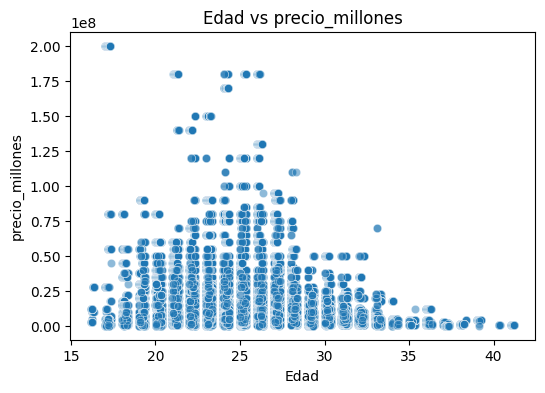

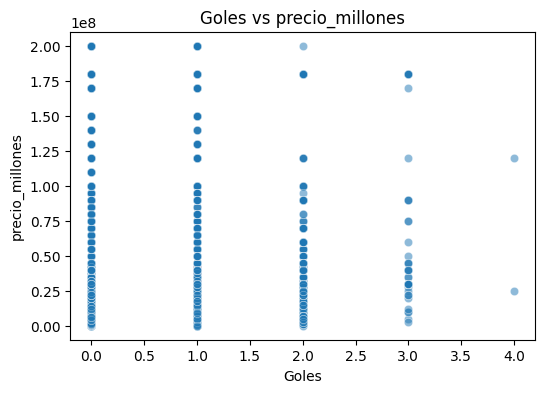

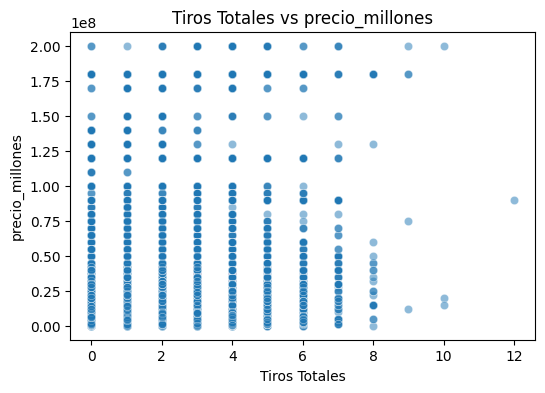

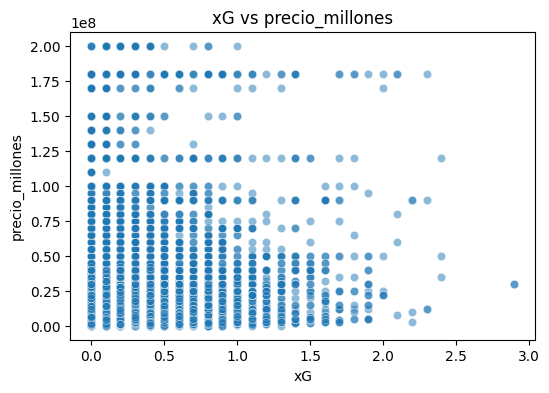

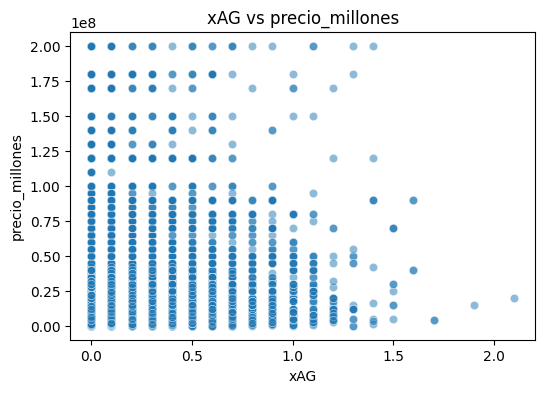

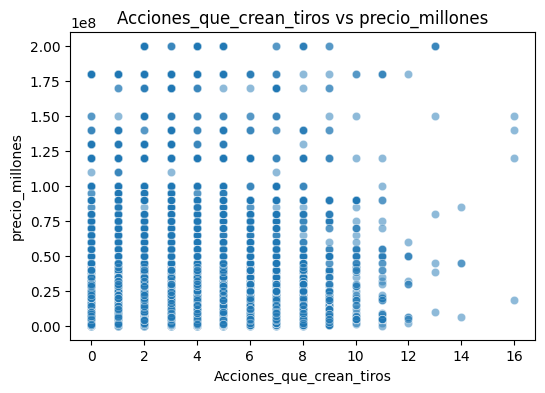

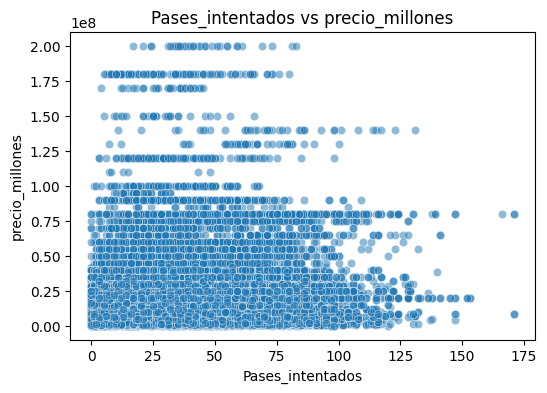

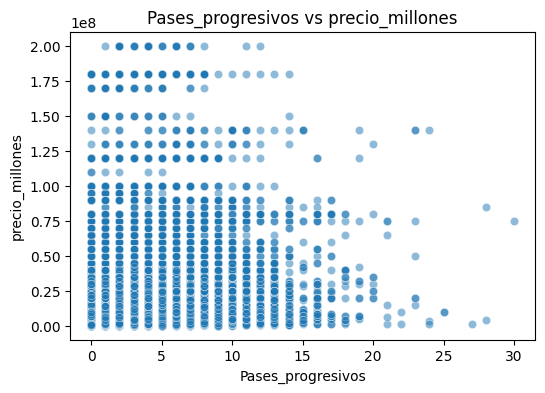

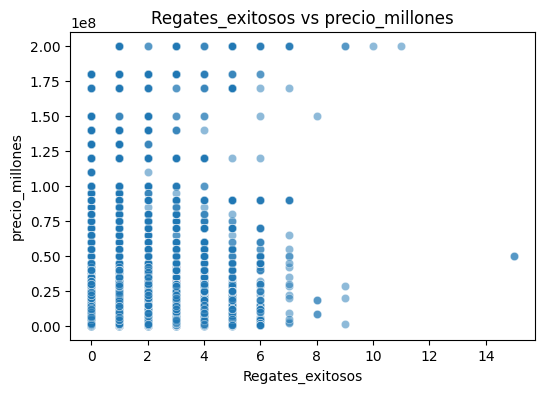

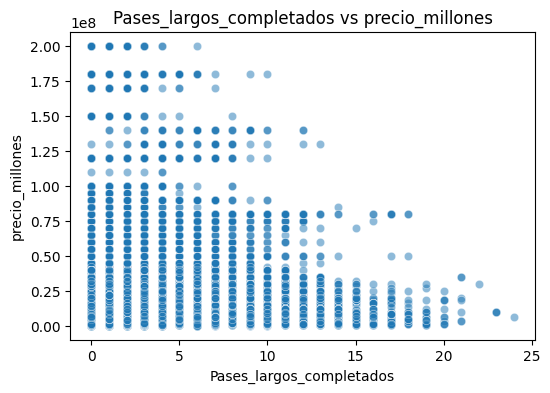

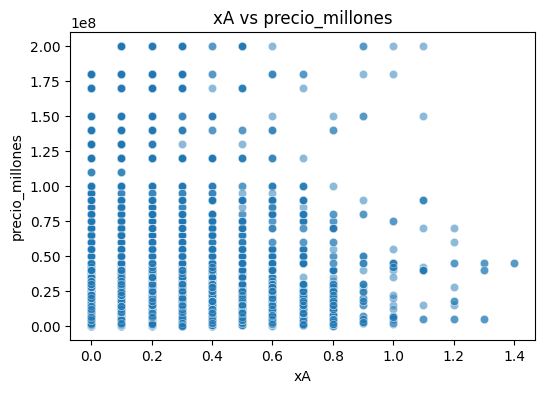

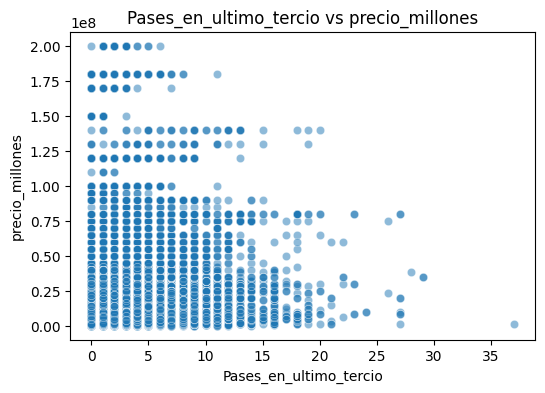

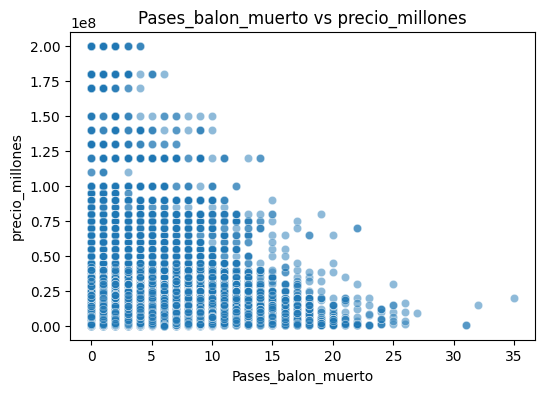

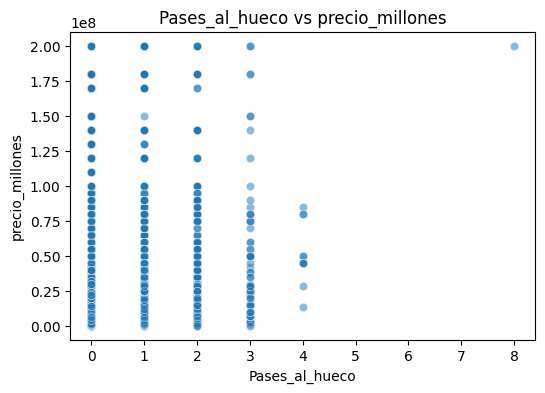

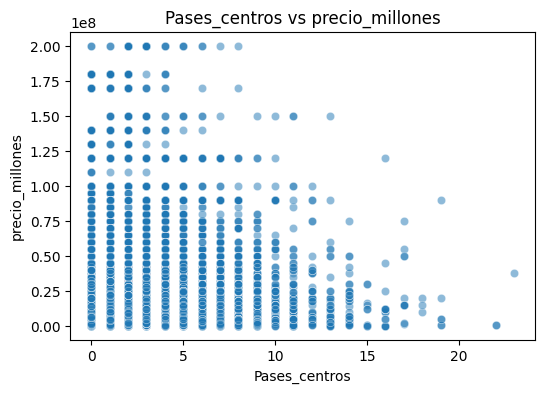

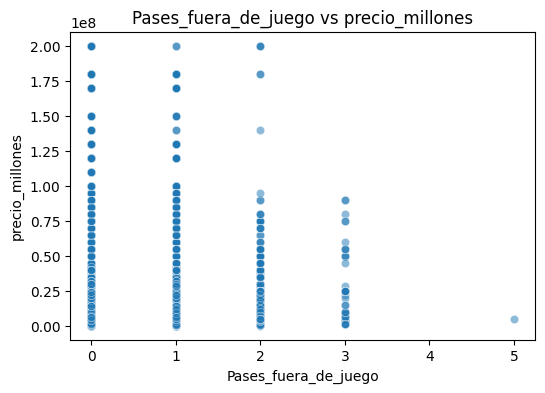

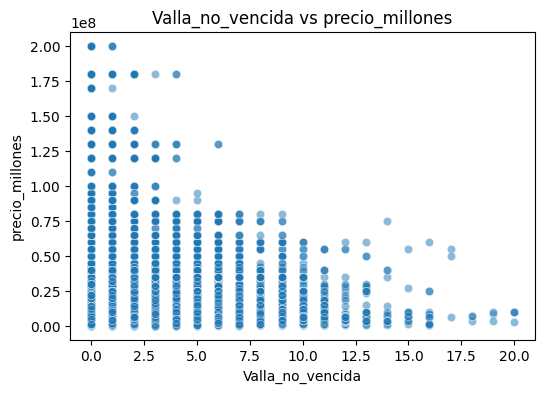

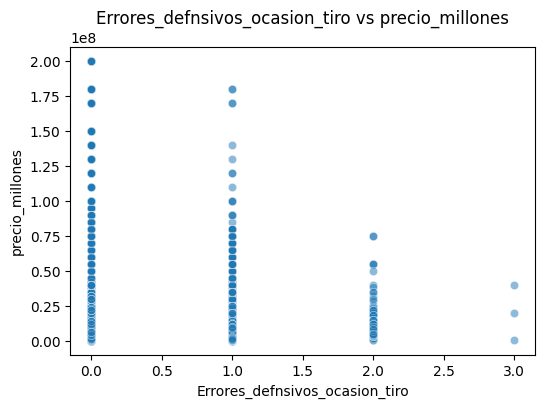

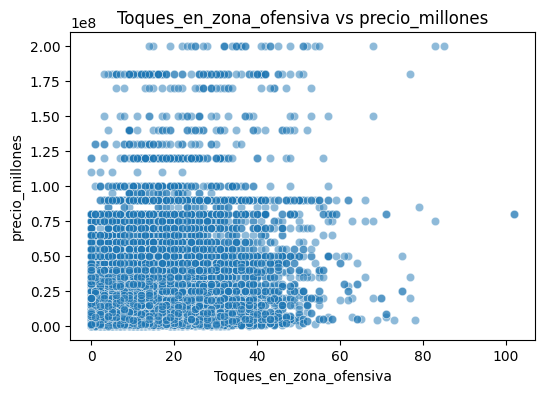

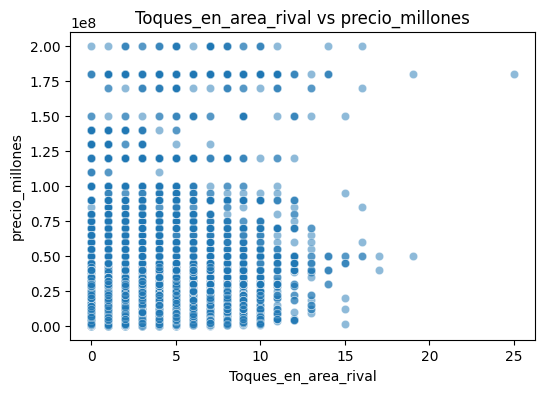

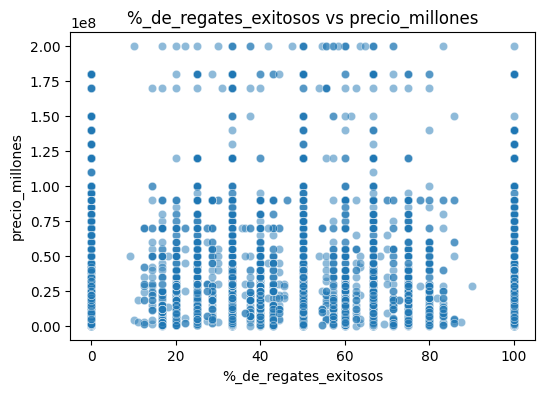

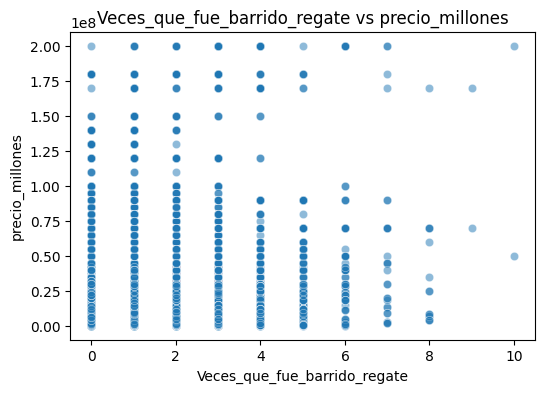

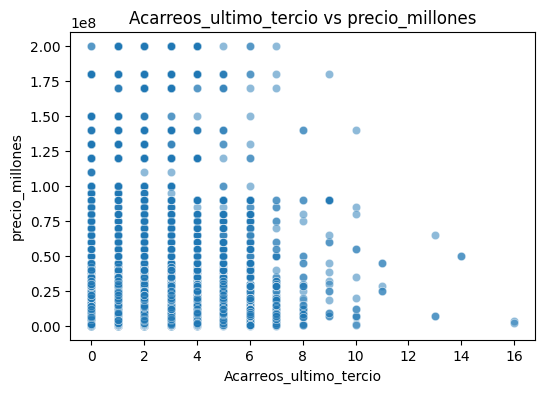

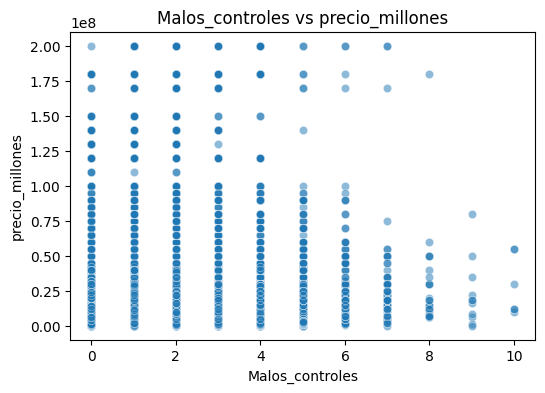

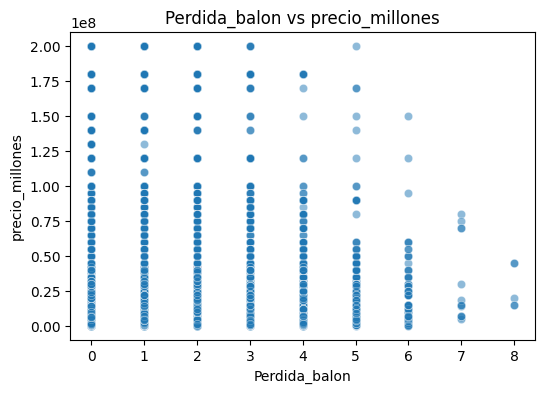

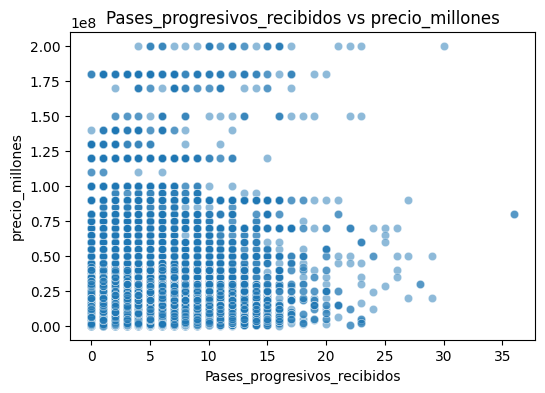

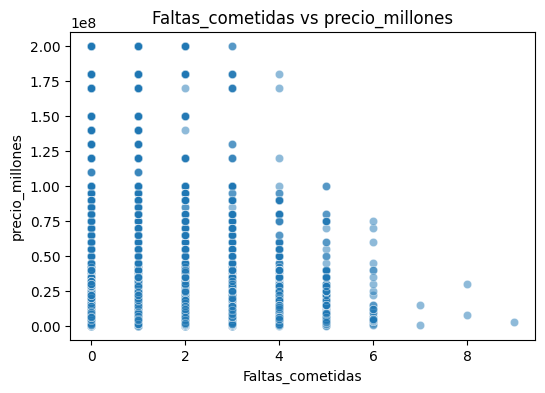

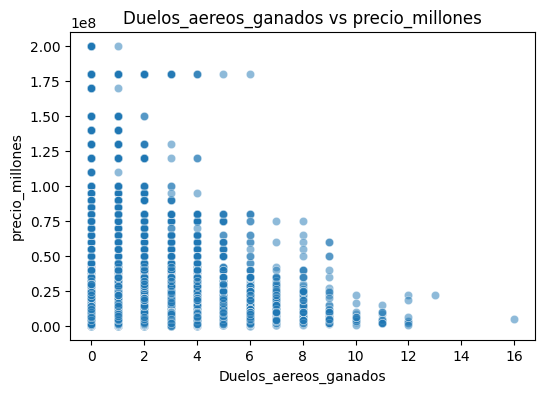

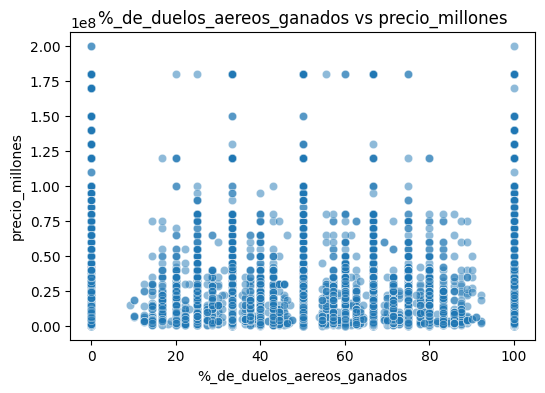

In [ ]:
cols_continuas = [col for col in X_filtrado.columns if "Nacionalidad" not in col]

for col in cols_continuas:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=X_filtrado[col], y=y, alpha=0.5)
    plt.title(f"{col} vs precio_millones")
    plt.xlabel(col)
    plt.ylabel("precio_millones")
    plt.show()

In [222]:
correlaciones_objetivo = X_filtrado[cols_continuas].corrwith(y)

correlaciones_ordenadas = correlaciones_objetivo.abs().sort_values(ascending=False)

top_vars = [col for col in correlaciones_ordenadas.index if col != "Edad"][:10]

for col in top_vars:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=X_filtrado[col], y=y, alpha=0.5)
    plt.title(f"{col} vs precio_millones (corr={correlaciones_objetivo[col]:.2f})")
    plt.xlabel(col)
    plt.ylabel("precio_millones")
    plt.show()

NameError: name 'X_filtrado' is not defined

Con esto obtenemos las variables mas correlacionadas con el precio en millones del jugador, con el fin de transformarlas y acercarlas mas a la linealidad.

In [ ]:
import numpy as np
from scipy.stats import skew

# Copia para no modificar el original
X_trans = X_filtrado.copy()

transformadas = {}

for col in top_vars:
    data = X_filtrado[col]
    asimetria = skew(data)

    if asimetria < -0.5:  # cola izquierda → aplicar potencia
        X_trans[col] = np.power(data, 2)   # o np.power(data, 3)
        transformadas[col] = "potencia (x^2)"
    elif asimetria > 0.5:  # cola derecha → aplicar log1p
        X_trans[col] = np.log1p(data)
        transformadas[col] = "log1p"
    else:
        transformadas[col] = "sin cambio"

print("Transformaciones aplicadas:")
for k,v in transformadas.items():
    print(f"{k}: {v}")


NameError: name 'X_filtrado' is not defined

In [188]:
nan_cols = X_trans.isna().sum()
print(nan_cols[nan_cols > 0])

df_limpio = X_filtrado.copy()

# 1. Eliminar columnas con muchos nulos
df_limpio = df_limpio.drop(columns=["%_de_regates_exitosos", "%_de_duelos_aereos_ganados"])
df_limpio = df_limpio.copy()
df_limpio["precio_millones"] = dffinal["precio_millones"].values
# 2. Eliminar filas con edad nula
df_limpio = df_limpio.dropna(subset=["Edad"])


NameError: name 'X_trans' is not defined

Con esto eliminamos algunas columnas con muchos valores NaN y en la edad eliminamos 18 registros que estan con valores NaN con el fin de que los pueda procesar el modelo posteriormente

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


X = df_limpio.drop(columns=["precio_millones"])
y = df_limpio["precio_millones"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print("====== Model Performance ======")
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))
print("===============================\n")


====== Model Performance ======
Train MAE: 12069168.937707428
Test MAE: 11983051.760162469
Train RMSE: 18811750.914263625
Test RMSE: 18745979.006592546
Train R²: 0.2750452474133047
Test R²: 0.2629663210503045



Como podemos ver, con las transformaciones y eliminacion de la colinealidad logramos reducir los valores de MAE y RMSE con respecto al modelo antes de las transformaciones.

## Normalidad y Homocedasticidad

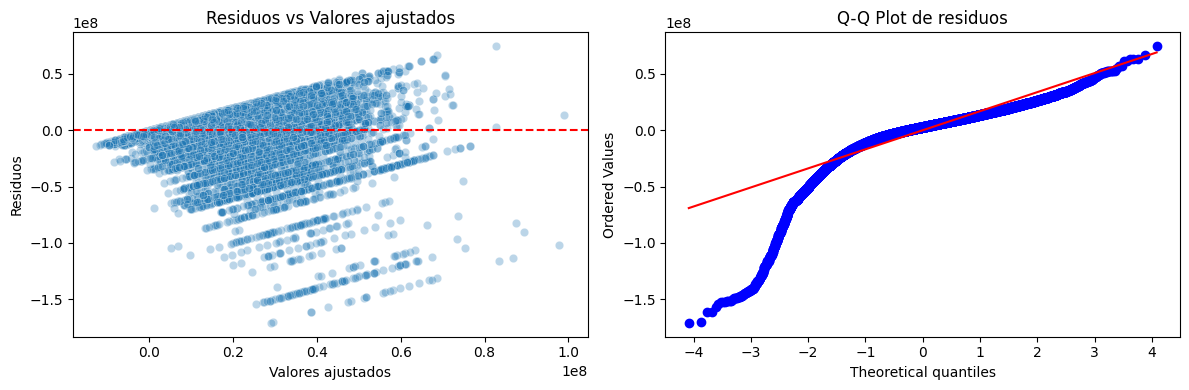

In [ ]:
from scipy import stats

errors = (model.predict(X_train).ravel() - y_train.values.ravel())

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(x=model.predict(X_train).ravel(), 
                y=errors, alpha=0.3, ax=axes[0])
axes[0].axhline(0, color="red", linestyle="--")
axes[0].set_xlabel("Valores ajustados")
axes[0].set_ylabel("Residuos")
axes[0].set_title("Residuos vs Valores ajustados")

stats.probplot(errors, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot de residuos")

plt.tight_layout()
plt.show()


Como se puede ver los puntos en la primera grafica estan distribuidos parcialmente de manera aleatoria sobre la linea roja, indicando que no hay homocedasticidad completa. Por otro lado podemos ver en el Q-Q plot, que los puntos se ajustan bastante bien a la linea, excepto por el inicio indicando que puede que todavia quedan valores atipicos o datos con distribuciones con una cola.

## analisis de los coeficientes

In [ ]:
coeficientes = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": model.coef_.ravel()
})

coef_filtrados = coeficientes[~coeficientes["Variable"].str.startswith("Nacionalidad_")]

coef_filtrados = coef_filtrados.sort_values(by="Coeficiente", ascending=False)

display(coef_filtrados.head(15))   
display(coef_filtrados.tail(15))  

,Variable,Coeficiente
4,xAG,4.817713e+06
3,xG,3.522683e+06
1,Goles,3.191792e+06
13,Pases_al_hueco,2.333910e+06
17,Errores_defnsivos_ocasion_tiro,1.357334e+06
19,Toques_en_area_rival,1.331924e+06
8,Regates_exitosos,1.111210e+06
18,Toques_en_zona_ofensiva,4.492190e+05
20,Veces_que_fue_barrido_regate,4.429169e+05
15,Pases_fuera_de_juego,4.098360e+05


,Variable,Coeficiente
6,Pases_intentados,1.224352e+05
11,Pases_en_ultimo_tercio,8.070974e+04
2,Tiros Totales,2.947734e+04
24,Pases_progresivos_recibidos,2.726434e+03
7,Pases_progresivos,-5.572718e+04
21,Acarreos_ultimo_tercio,-1.230098e+05
23,Perdida_balon,-1.315836e+05
16,Valla_no_vencida,-1.379100e+05
10,xA,-3.118876e+05
12,Pases_balon_muerto,-3.569099e+05


C:\Users\esteb\AppData\Local\Temp\ipykernel_29584\2681654890.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


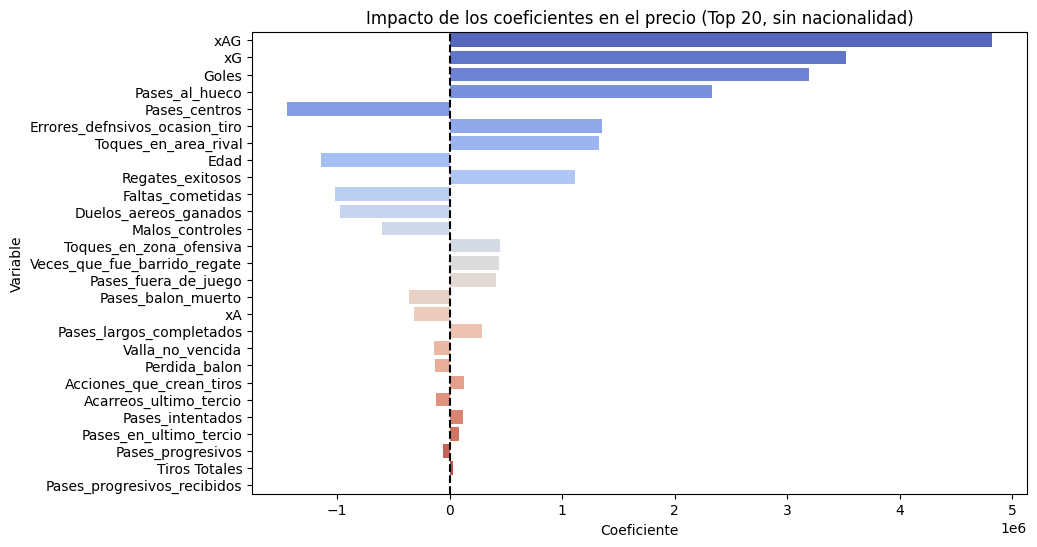

In [ ]:
coeficientes = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": model.coef_.ravel()
})

coef_filtrados = coeficientes[~coeficientes["Variable"].str.startswith("Nacionalidad_")]

coef_filtrados = coef_filtrados.reindex(
    coef_filtrados["Coeficiente"].abs().sort_values(ascending=False).index
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=coef_filtrados.head(30), 
    x="Coeficiente", 
    y="Variable", 
    palette="coolwarm"
)
plt.title("Impacto de los coeficientes en el precio (Top 20, sin nacionalidad)")
plt.axvline(0, color="black", linestyle="--")
plt.show()

Aca podemos observar el impacto de los coeficientes en el precio, mostrando como algunas estadisticas como xAG,xG y goles son proporciales al precio (es decir que si sube esta estadistica el precio tambien), mientras que algunas otras como la Edad,Pases_centros y malos controles son inversamente proporcionales al precio.